# Simulación del Movimiento Browniano (y algunos procesos relacionados)
____
# ESE IPN
___

# Mercado de Derivados
___
# Dr. Josué Alan Cantú Esquivel
___

## Alumno: 
___

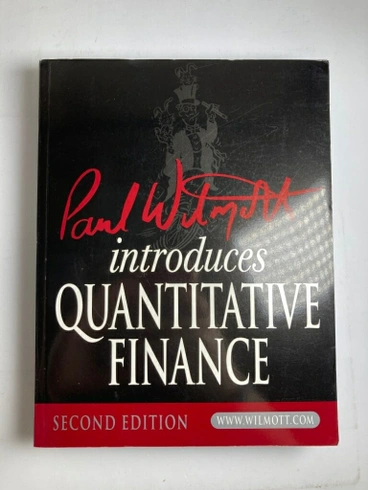

## Convergencia de la Distribución Binomial a la Distribución Normal

Paul Wilmott en su libro *Quantitative Finance* describe la transición de una **distribución binomial** a una **distribución normal gaussiana** en el contexto de procesos estocásticos, lo que es clave para entender el **movimiento browniano**.

### 1. Distribución Binomial y su Convergencia a la Normal

La **distribución binomial** describe un proceso con dos resultados posibles en cada experimento, como el **lanzamiento de una moneda**, donde los resultados son cara (1) o cruz (-1).

- **Distribución Binomial**: En un experimento con \(n\) pruebas y probabilidad de éxito \(p\), el número de éxitos sigue la distribución binomial:
  
$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n-k}
$$



## Ejemplo de Distribución Binomial: Lanzamiento de Monedas

Un ejemplo sencillo de una **distribución binomial** para el caso de 10 volados, con una probabilidad del 50% para cara y 50% para cruz, sería el siguiente:

### Parámetros
- **Número de volados (pruebas)**: \( n = 10 \)
- **Probabilidad de éxito (cara)**: \( p = 0.5 \)
- **Probabilidad de fracaso (cruz)**: \( 1 - p = 0.5 \)

La distribución binomial describe la probabilidad de obtener un cierto número de **caras** (éxitos) en 10 lanzamientos independientes de una moneda.

### Fórmula de la Distribución Binomial
La probabilidad de obtener exactamente \( k \) caras (éxitos) en 10 lanzamientos se puede calcular con la fórmula de la distribución binomial:

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

Donde:
- \( n \) es el número total de pruebas (10 lanzamientos),
- \( k \) es el número de éxitos (caras),
- \( p \) es la probabilidad de éxito (0.5),
- \( \binom{n}{k} \) es el **coeficiente binomial**, que cuenta las formas en que podemos obtener \( k \) éxitos en \( n \) pruebas.

### Ejemplo: Obtener 5 caras en 10 volados
La probabilidad de obtener **exactamente 5 caras** en 10 volados se puede calcular de la siguiente manera:

$$
P(X = 5) = \binom{10}{5} (0.5)^5 (0.5)^{5}
$$

El coeficiente binomial $( \binom{10}{5} )$ es igual a:

$$
\binom{10}{5} = \frac{10!}{5!(10-5)!} = 252
$$

Entonces, la probabilidad sería:

$$
P(X = 5) = 252 \cdot (0.5)^{10} = 252 \cdot 0.0009765625 = 0.246
$$

Esto significa que la probabilidad de obtener **exactamente 5 caras** en 10 lanzamientos de una moneda es aproximadamente **24.6%**.

### Distribución completa para todos los posibles resultados
Podemos calcular la probabilidad para cualquier número de caras, desde 0 hasta 10, de la misma manera. La suma de todas estas probabilidades será igual a 1.

Aquí tienes un resumen de las probabilidades para obtener \( k \) caras en 10 volados:

| Número de Caras (k) | Probabilidad \( P(X = k) \) |
|---------------------|-----------------------------|
| 0                   | 0.00098                     |
| 1                   | 0.00977                     |
| 2                   | 0.04395                     |
| 3                   | 0.11719                     |
| 4                   | 0.20508                     |
| 5                   | 0.24609                     |
| 6                   | 0.20508                     |
| 7                   | 0.11719                     |
| 8                   | 0.04395                     |
| 9                   | 0.00977                     |
| 10                  | 0.00098                     |

### Interpretación
La probabilidad de obtener 5 caras es la más alta, con 24.6%, mientras que la probabilidad de obtener 0 o 10 caras es muy baja (alrededor del 0.1%).

Este ejemplo demuestra cómo una **distribución binomial** puede modelar eventos con dos posibles resultados, como el lanzamiento de una moneda, y cómo calcular la probabilidad de obtener un cierto número de éxitos.


- **Teorema del Límite Central (TLC)**: Conforme el número de pruebas (n) aumenta, la distribución binomial converge a una **distribución normal** con media $(n \cdot p$) y desviación estándar $( \sqrt{n \cdot p \cdot (1-p)} )$.

___

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [5]:
# Generación de 10 datos aleatorios (volados)...
np.random.choice((-1,1),10)

array([-1,  1, -1, -1, -1, -1,  1, -1,  1,  1])

In [6]:
# Semilla aleatoria para fines de reproductibilidad...
import random
random.seed(123)

In [7]:
# Almacenamiento del rasultado en la variable array...
datos=np.random.choice((-1,1),10)
datos

array([ 1, -1, -1, -1, -1, -1,  1, -1, -1,  1])

In [8]:
# Calcular la suma acumulada (caminata aleatoria)...
caminata=np.cumsum(datos)
caminata

array([ 1,  0, -1, -2, -3, -4, -3, -4, -5, -4])

Resultado de cada tiro:
[-1  1 -1  1  1 -1 -1 -1 -1 -1]
Resultado acumulado de los tiros:
[-1  0 -1  0  1  0 -1 -2 -3 -4]


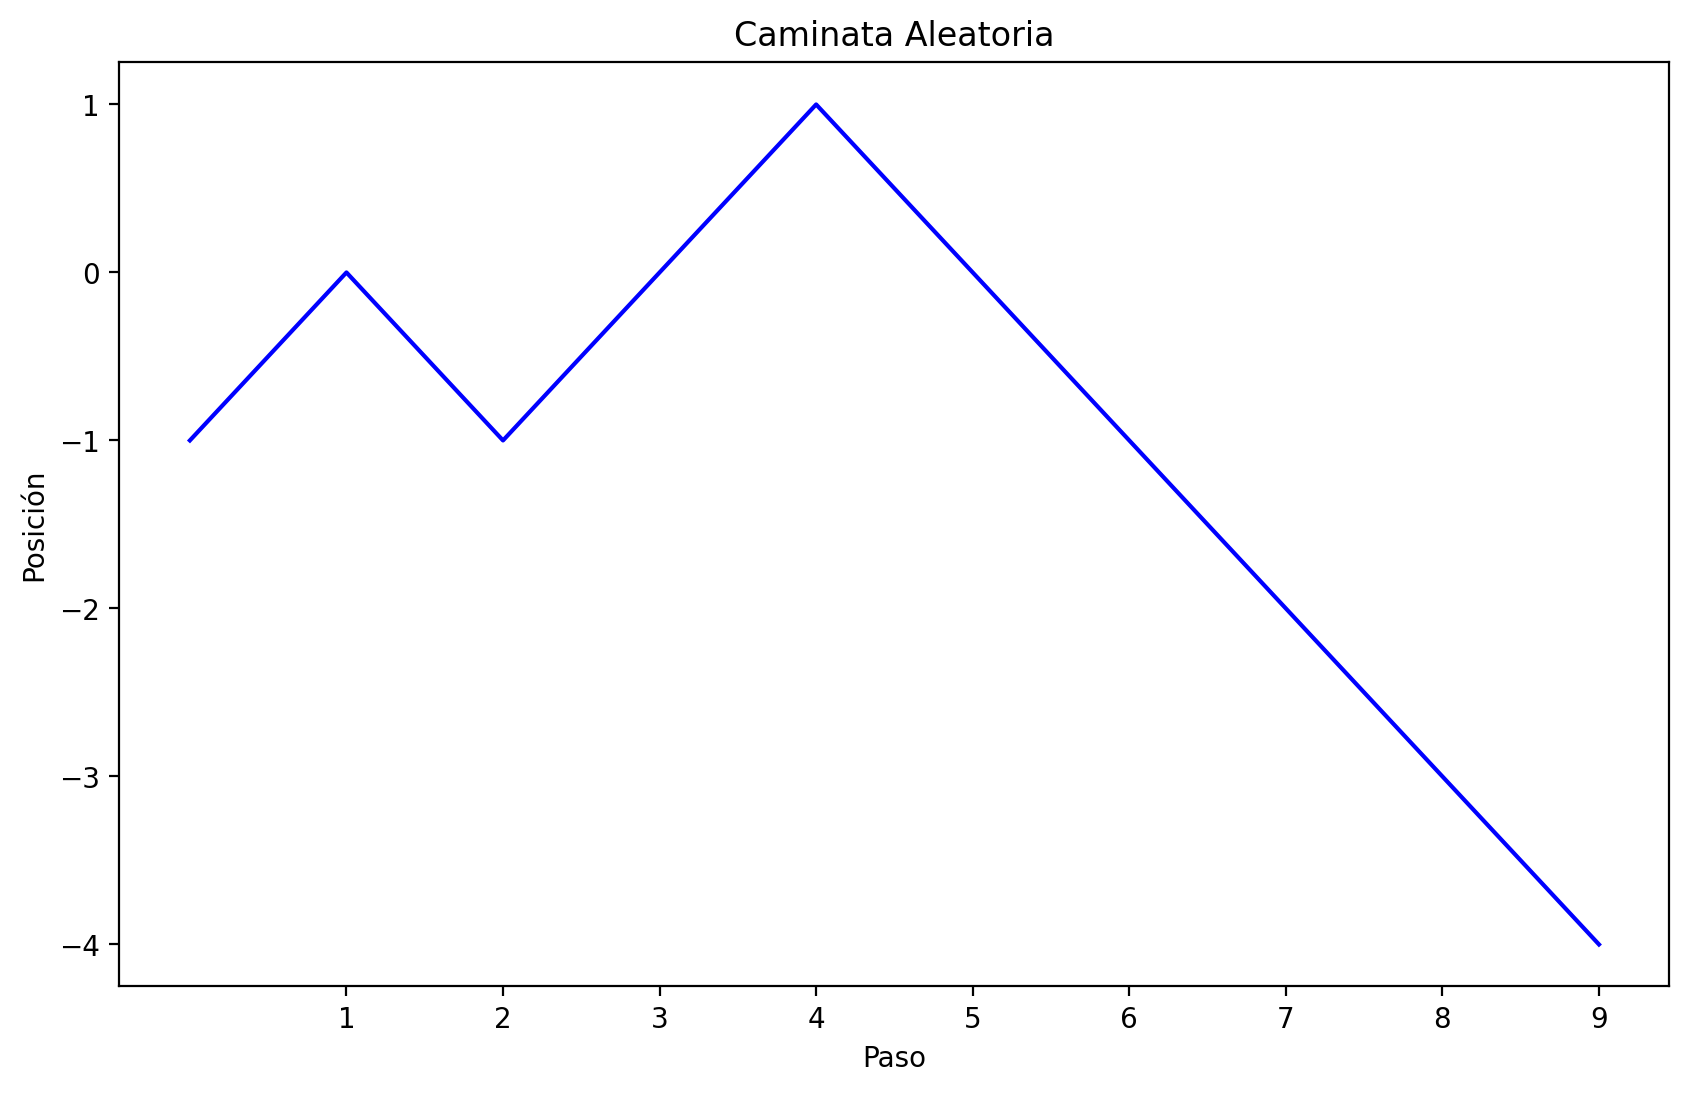

In [9]:
datos=np.random.choice((-1,1),10)
print("Resultado de cada tiro:")
print(datos)

caminata=np.cumsum(datos)
print("Resultado acumulado de los tiros:")
print(caminata)

# Graficar la caminata aleatoria
plt.figure(figsize=(10,6))
# Establecer los ticks del eje X para mostrar del 1 al 10
plt.xticks(range(1, len(caminata) + 1))

# Agregar etiquetas y título
plt.xlabel('Paso')
plt.ylabel('Posición')
plt.title('Caminata Aleatoria')

plt.plot(caminata, color='blue')

In [10]:
# Ponderación en escala de 1: usualmente los modelos de riesgos se hacen en escalas 360/360=1, pero puede hacerse más fino
grid = np.linspace(0,1, 1001)
grid

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [11]:
len(grid)

1001

### Almacenamiento de datos con el método `np.append`
___

`np.append(0, np.random.choice((-1,1),1000).cumsum())`

Esta función genera un array de 1000 valores aleatorios, cada uno de los cuales puede ser -1 o 1. 

`np.append(0, ...)`

agrega un cero al inicio de la secuencia de la suma acumulada. El resultado es un array que comienza en 0 y luego sigue con la suma acumulada de los valores -1 y 1. Esto se hace generalmente para representar la posición inicial en una caminata aleatoria.

In [13]:
S = np.append(0, np.random.choice((-1,1),1000).cumsum())
S

array([ 0,  1,  2, ..., 22, 21, 20])

In [14]:
len(S)

1001

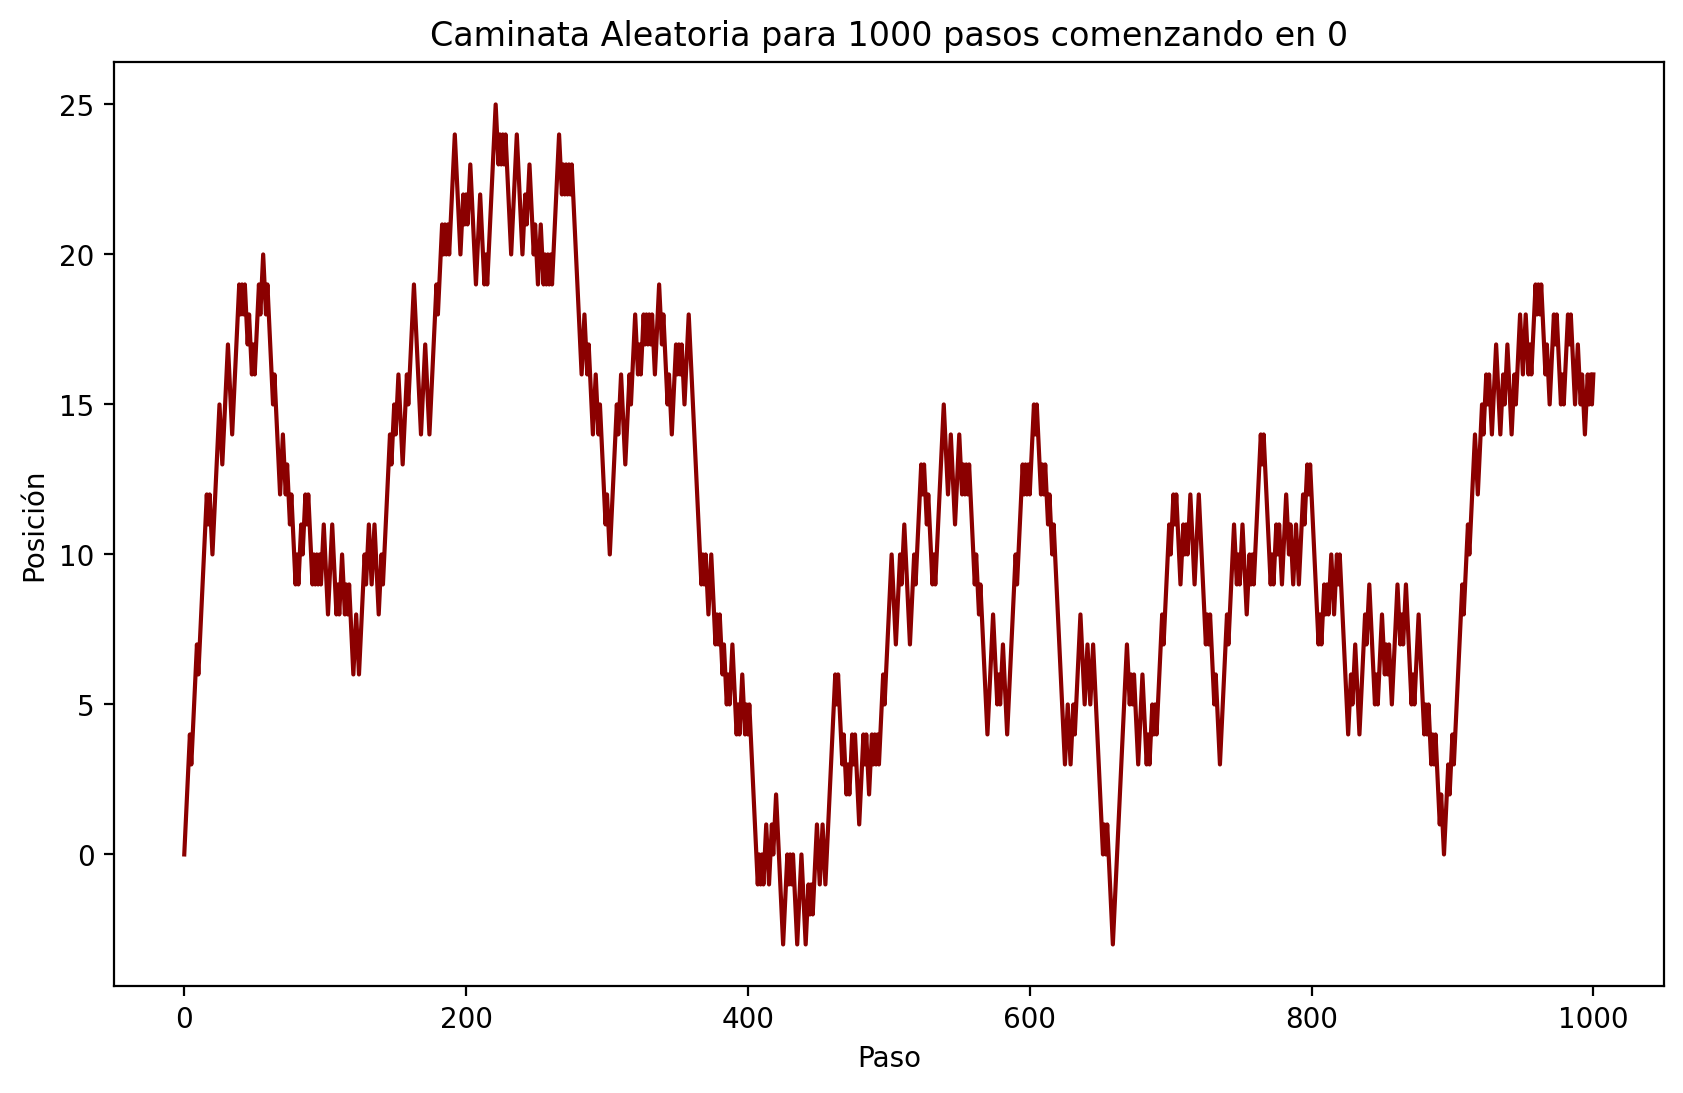

In [15]:
plt.figure(figsize=(10,6))
# Establecer los ticks del eje X para mostrar del 1 al 10
#plt.xticks(range(1, len(S) + 1))
S = np.append(0, np.random.choice((-1,1),1000).cumsum())
# Agregar etiquetas y título
plt.xlabel('Paso')
plt.ylabel('Posición')
plt.title('Caminata Aleatoria para 1000 pasos comenzando en 0')

plt.plot(S, color='darkred')

### 2. Relación entre la Partición del Tiempo y la Raíz Cuadrada

Para el **movimiento browniano**, los pasos aleatorios se ajustan proporcionalmente al tiempo para reflejar la naturaleza de las fluctuaciones estocásticas.

- **Raíz cuadrada del tiempo**: Si dividimos el tiempo total \(T\) en \(n\) pasos con $(\Delta t = T/n)$, las fluctuaciones aleatorias de un activo financiero en el tiempo $(\Delta t)$ son proporcionales a $(\sqrt{\Delta t})$, es decir:

$$
\Delta W_t \propto \sqrt{\Delta t}
$$

- **Escalabilidad**: Si los pasos fueran proporcionales a $(\Delta t)$ en lugar de $(\sqrt{\Delta t})$, los cambios acumulados crecerían demasiado rápido, lo que no representaría el comportamiento real de un proceso estocástico como el movimiento browniano.

In [17]:
X_T = S/(1000**0.5)
X_T

array([0.        , 0.03162278, 0.06324555, ..., 0.50596443, 0.47434165,
       0.50596443])

### Declaración del grid/parrilla
___

Text(0.5, 1.0, 'Aproximación de una trayectoria del MB a través de una Caminata Aleatoria')

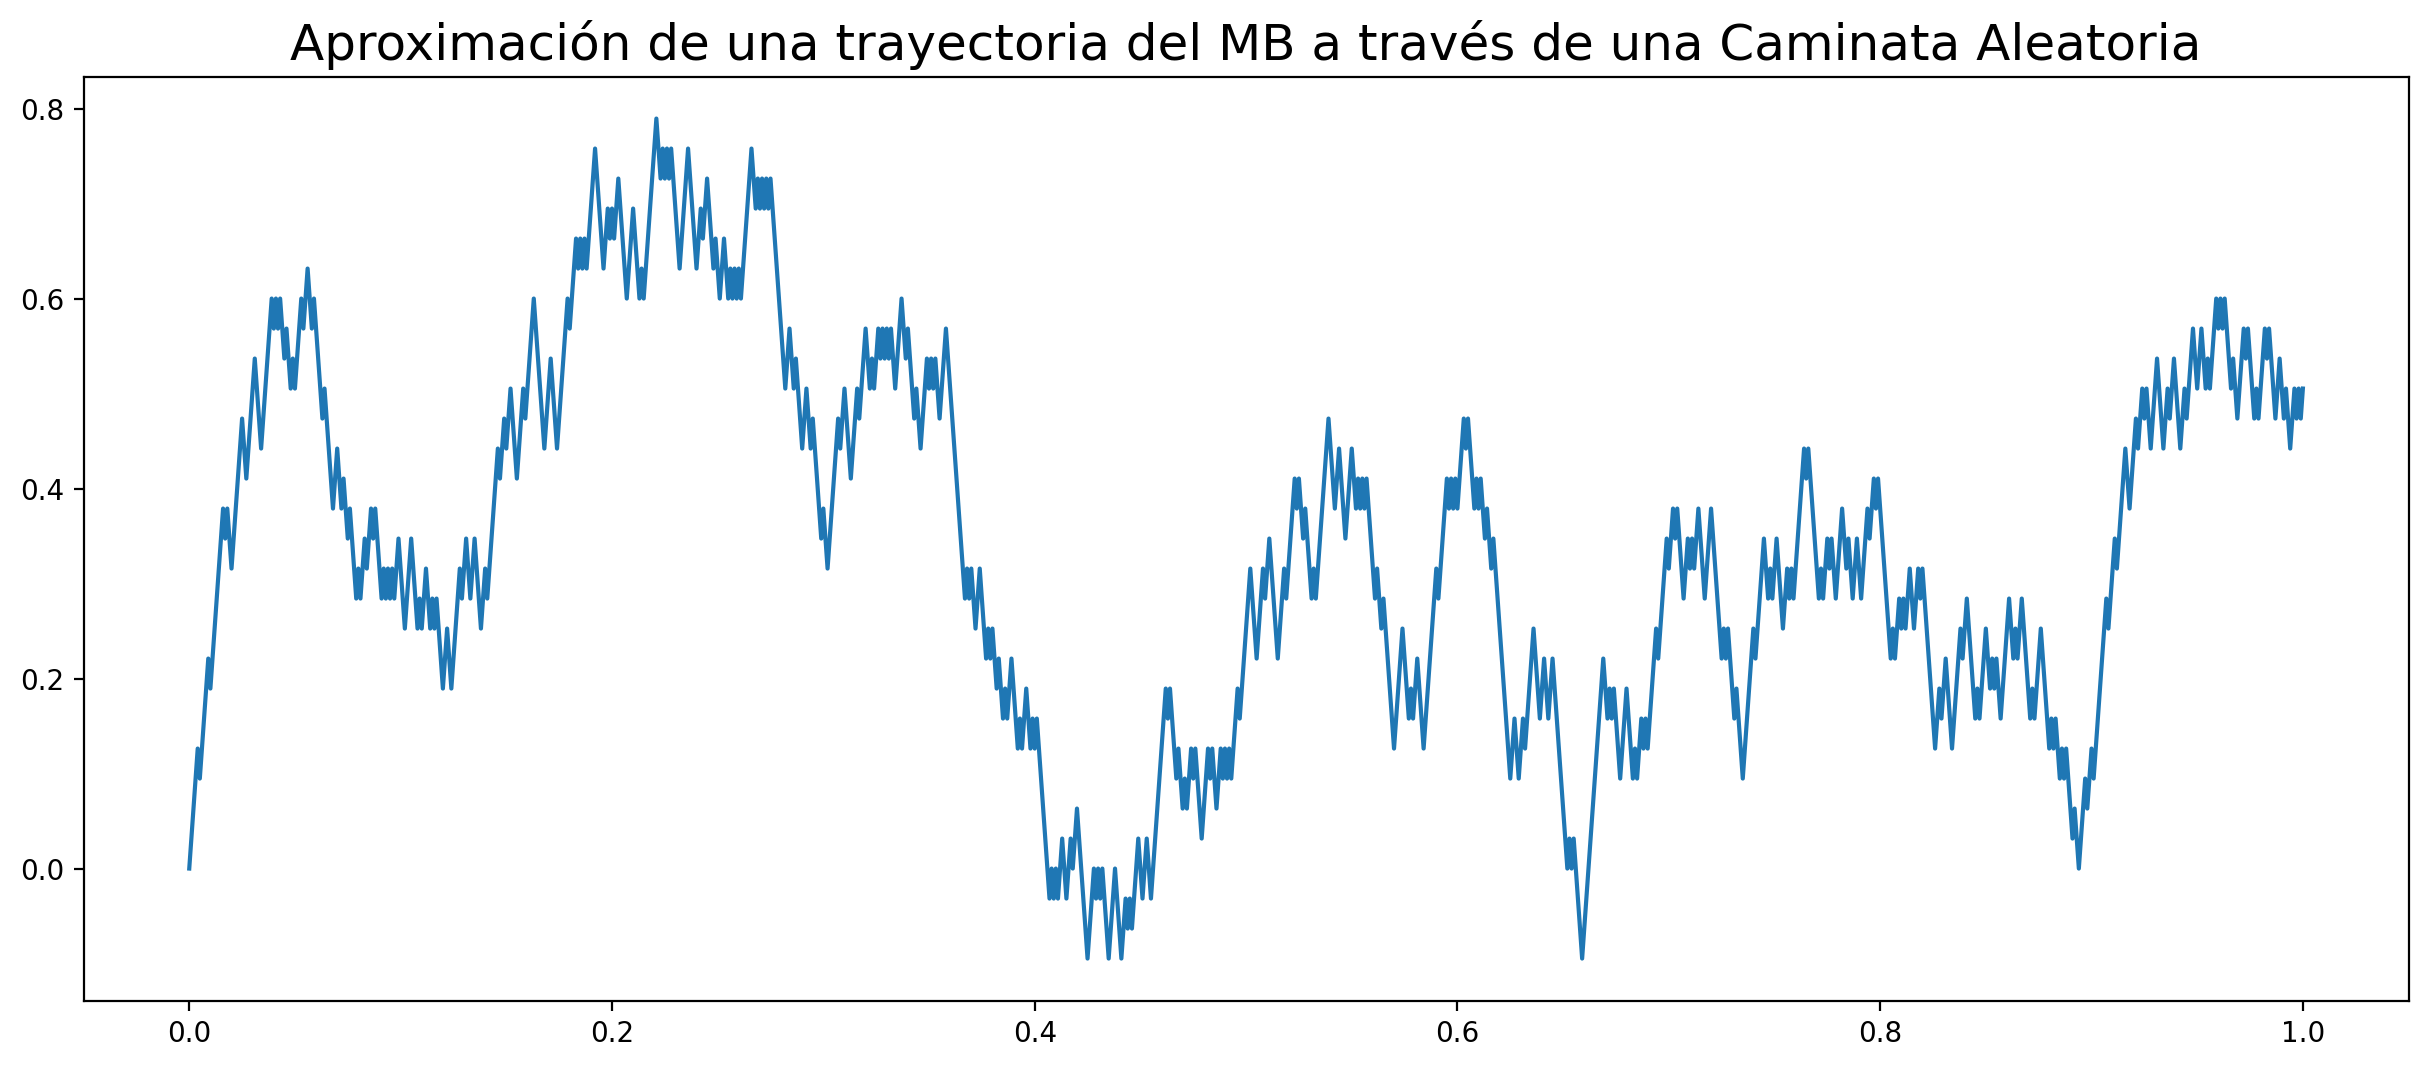

In [19]:
# Primero simularemos por medio de una caminata aleatoria.
grid = np.linspace(0,1,1001)
np.random.seed(seed = 123)
# Se declara el paso en ponderación del tiempo (T)
X_T = S/(len(S)**0.5)
plt.figure(figsize=(15,6))
plt.plot(grid,X_T)
plt.title("Aproximación de una trayectoria del MB a través de una Caminata Aleatoria", fontsize = 18)

Sea $\{B_t: t \geq 0\}$ entonces es un movimiento browniano si

1. $B_0$ = 0
2. Tiene incrementos independientes y estacionarios
3. $B_t - B_s \sim N(0,t-s)$ si $s < t$
4. Tiene trayectorias continuas.

$B_{t_k} = \sum_{i=1}^k(B_{t_i}-B_{t_{i-1}})$

Para simular la trayectorias de un MB utilizaremos la propiedad de incrementos independientes y estacionarios, basta saber simulas observaciones independientes de una distribución normal.

In [22]:
stats.norm.rvs(0,(1/1000)**0.5, size = 1000)

array([-3.43306540e-02,  3.15388323e-02,  8.94856583e-03, -4.76332212e-02,
       -1.82969465e-02,  5.22230087e-02, -7.67383356e-02, -1.35634082e-02,
        4.00324195e-02, -2.74087381e-02, -2.14682651e-02, -2.99496057e-03,
        4.71618810e-02, -2.02038551e-02, -1.40399423e-02, -1.37353934e-02,
        6.97576342e-02,  6.91522480e-02,  3.17509721e-02,  1.22122862e-02,
        2.33176417e-02,  4.71410859e-02, -2.95936654e-02,  3.71829792e-02,
       -3.96511882e-02, -2.01674733e-02,  2.86851850e-02, -4.51788506e-02,
       -4.42936185e-03, -2.72510826e-02, -8.08339425e-03, -8.84991581e-02,
       -5.60207956e-02, -2.21320614e-02,  2.93289373e-02, -5.49084241e-03,
        8.99957626e-05,  2.17635130e-02, -2.78133813e-02,  8.96908350e-03,
       -2.54679255e-02, -5.46337065e-02, -1.23613369e-02,  1.81453346e-02,
        1.07071259e-02, -3.74113084e-04,  7.56532324e-02,  1.30574290e-02,
        3.09503501e-02,  7.07763068e-02, -4.09225711e-02, -3.28493675e-02,
        5.51410222e-02, -

Text(0.5, 1.0, 'Trayectoria de un Movimiento Browniano estándar')

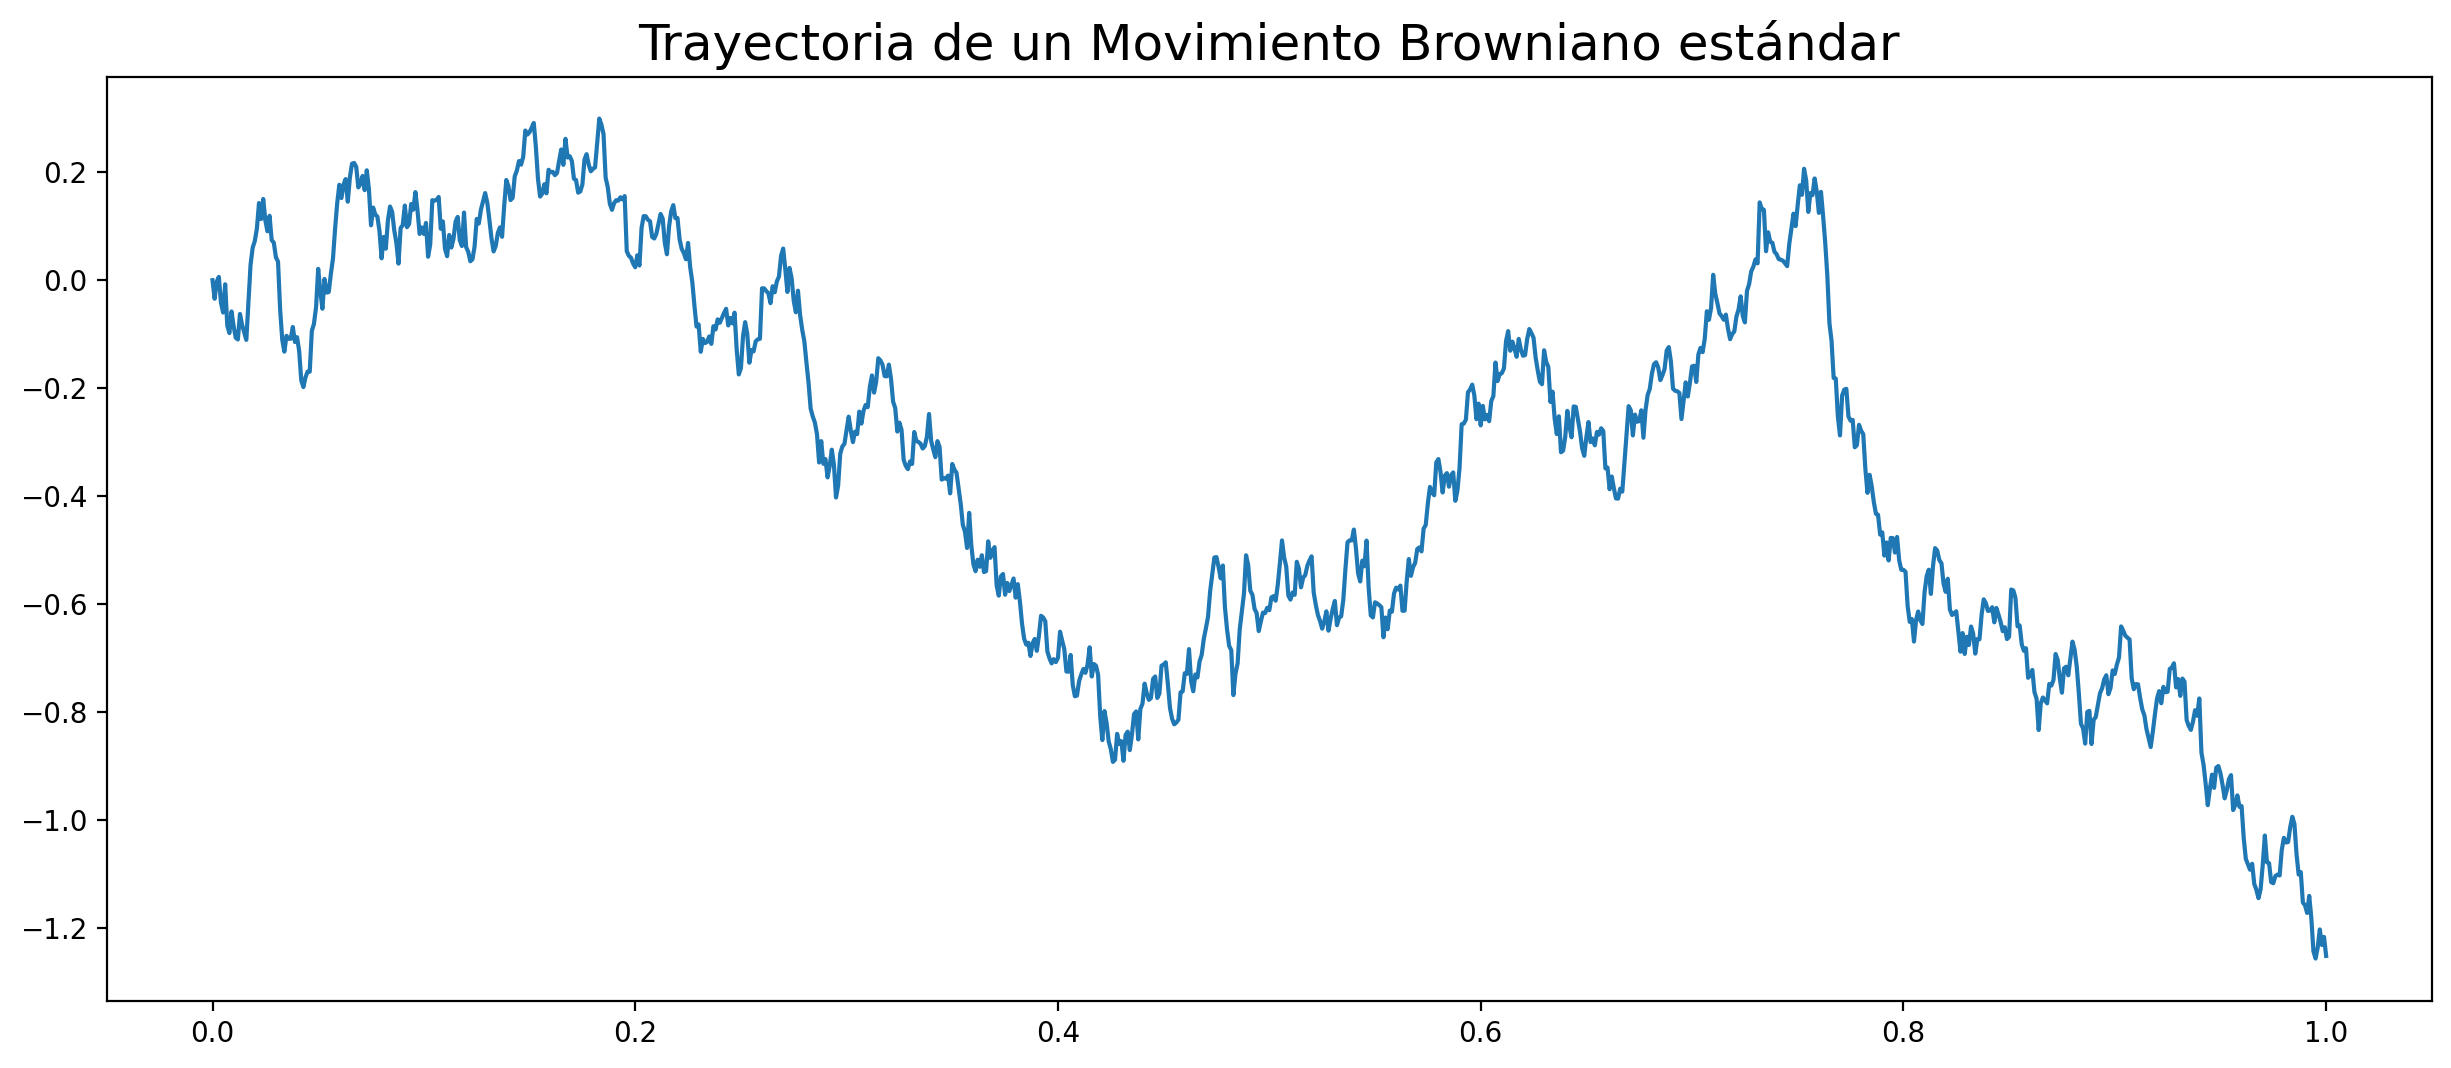

In [23]:
## Scipy nos permite simular varias distribuciones, entre ellas la normal
grid = np.linspace(0,1,1001)
np.random.seed(seed = 123)
Browniano = np.append(0,stats.norm.rvs(0,(1/1000)**0.5,size = 1000).cumsum())
plt.figure(figsize=(15,6))
plt.plot(grid,Browniano)
plt.title("Trayectoria de un Movimiento Browniano estándar", fontsize = 18)

In [24]:
Browniano

array([ 0.        , -0.03433065, -0.00279182, ..., -1.23085237,
       -1.21598132, -1.25112784])

Text(0.5, 1.0, 'Trayectorias de 100 Movimientos Brownianos Estándar')

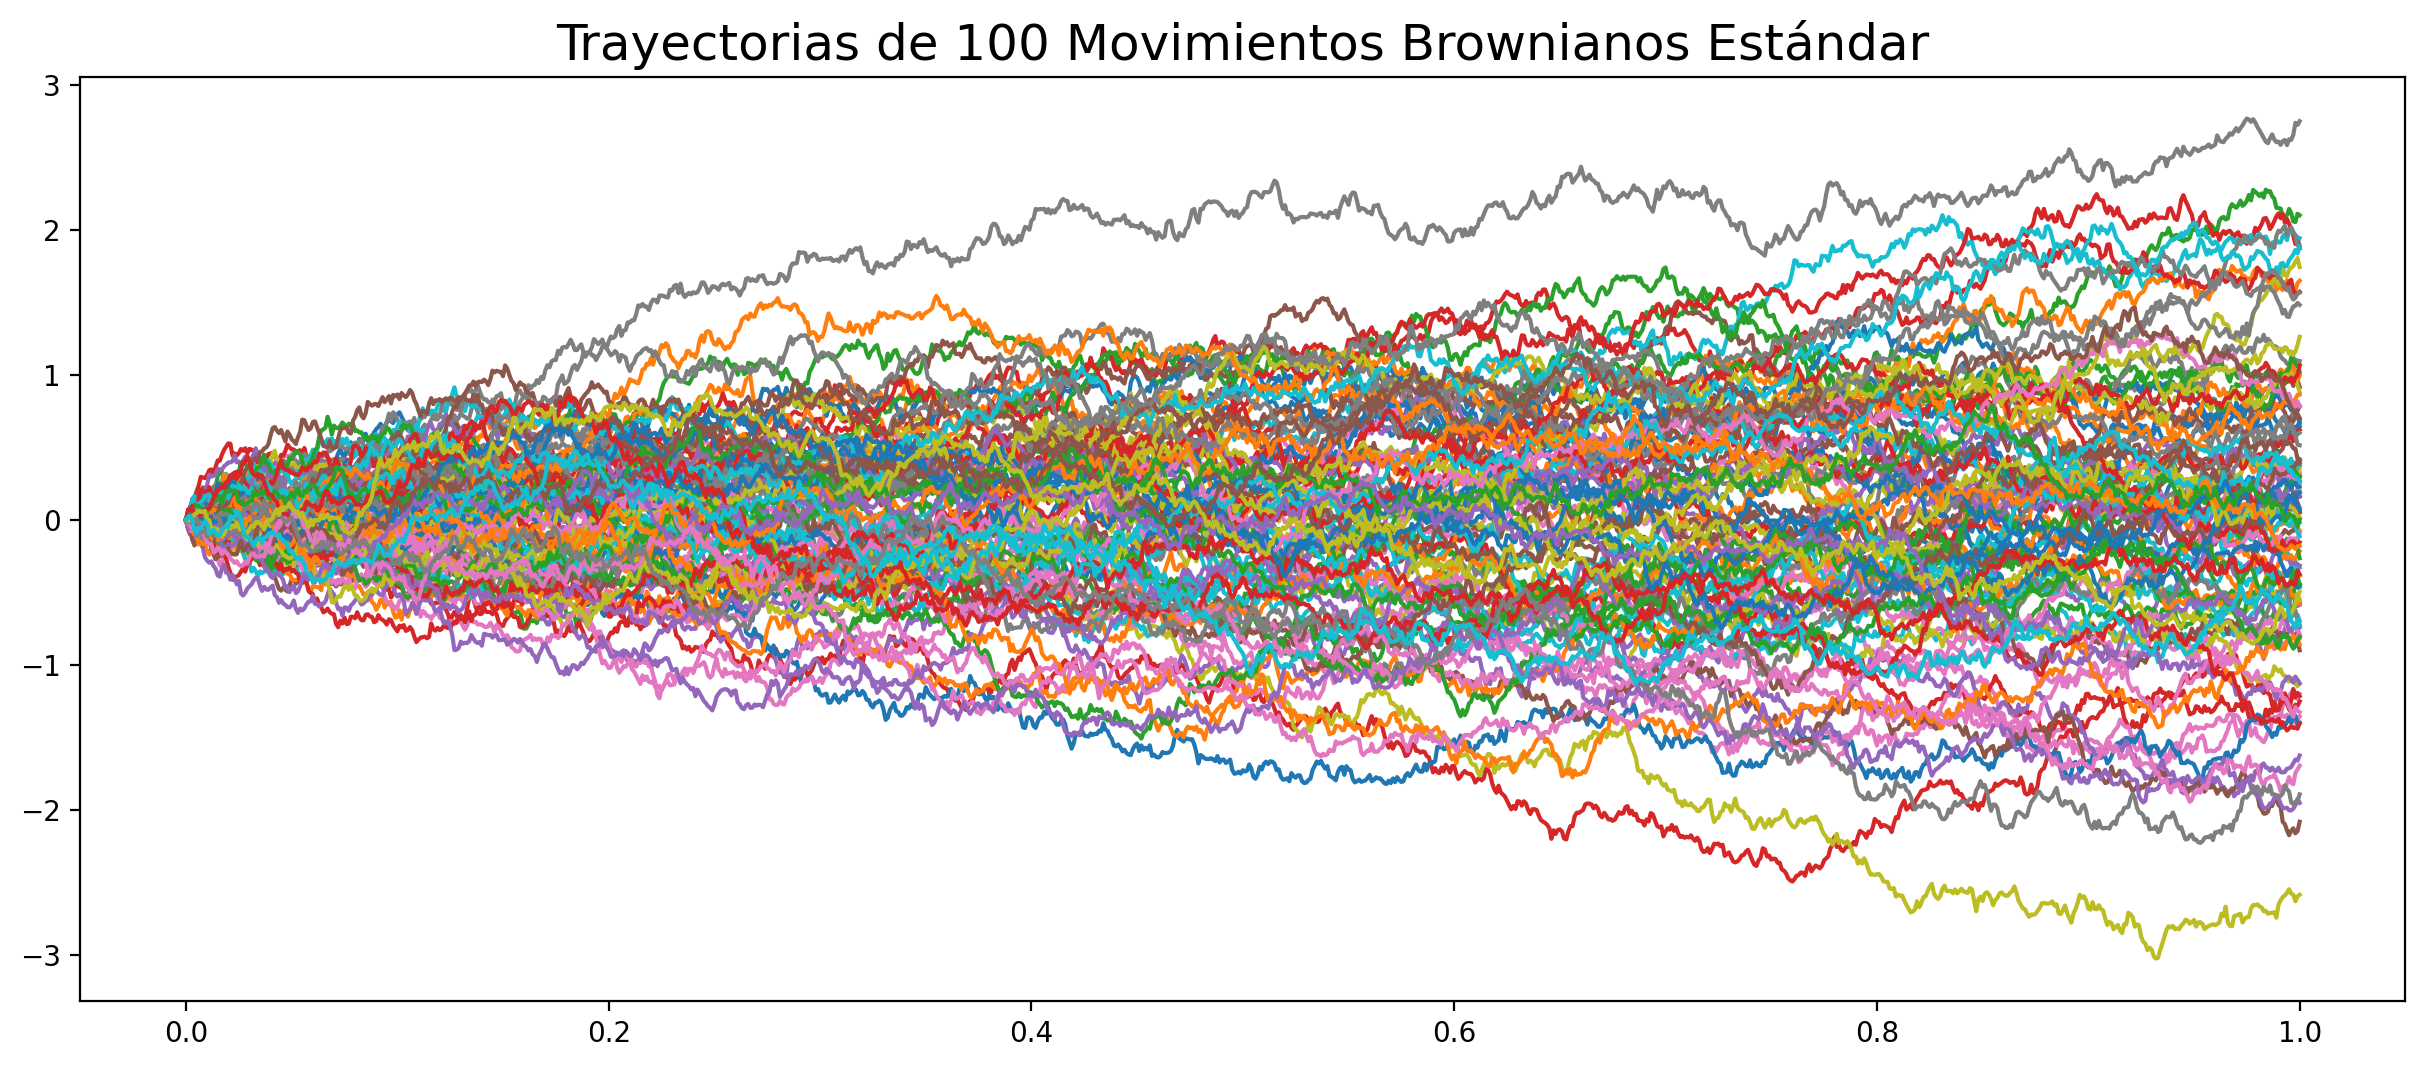

In [25]:
#Vamos a simular varias trayectorias juntas
grid = np.linspace(0,1,1001)

plt.figure(figsize=(15,6))

for i in range(100):
    Browniano = np.append(0,stats.norm.rvs(0,(1/1000)**0.5,size = 1000).cumsum())
    plt.plot(grid,Browniano)

plt.title("Trayectorias de 100 Movimientos Brownianos Estándar", 
          fontsize = 18)  

### 3. Importancia en Finanzas Cuantitativas

En finanzas cuantitativas, la convergencia de la **distribución binomial** a la **normal** es crucial para modelar los precios de activos financieros como acciones o bonos.

- La distribución normal permite usar el **movimiento browniano geométrico** para modelar la evolución del precio de activos financieros. Este modelo es la base del **modelo Black-Scholes**, usado para calcular el precio de opciones y otros derivados.



En conclusión, la transición de la distribución binomial a la normal facilita la aplicación del **movimiento browniano** en modelos financieros, ya que permite modelar trayectorias estocásticas. El ajuste del tamaño de los pasos aleatorios según $(\sqrt{\Delta t})$ asegura que la volatilidad crezca de manera coherente con el tiempo.


## Función `stats.norm.rvs()`

La función `stats.norm.rvs()` proviene de la biblioteca `scipy.stats` de Python y se utiliza para generar números aleatorios a partir de una distribución normal (también conocida como distribución gaussiana).

### Desglose de la función `stats.norm.rvs()`

- **`stats`**: Es un módulo de `SciPy` que contiene una amplia gama de funciones para estadísticas y distribuciones.
- **`norm`**: Es una distribución normal. `stats.norm` proporciona métodos y propiedades relacionadas con la distribución normal.
- **`rvs()`**: Significa "random variates" o "random variables" (variables aleatorias). Esta función genera números aleatorios que siguen la distribución normal especificada.

### Sintaxis de `stats.norm.rvs()`

La función generalmente se utiliza con la siguiente sintaxis:

```python
stats.norm.rvs(loc=0, scale=1, size=1)

`loc`: Este parámetro especifica la media de la distribución normal. Por defecto, es 0.

`scale`: Este parámetro especifica la desviación estándar de la distribución normal. Por defecto, es 1.

`size`: Este parámetro indica cuántos números aleatorios deseas generar. Puede ser un entero o una tupla que define la forma del array que se devolverá.


Text(0.5, 1.0, 'Trayectoria del Browniano Geométrico')

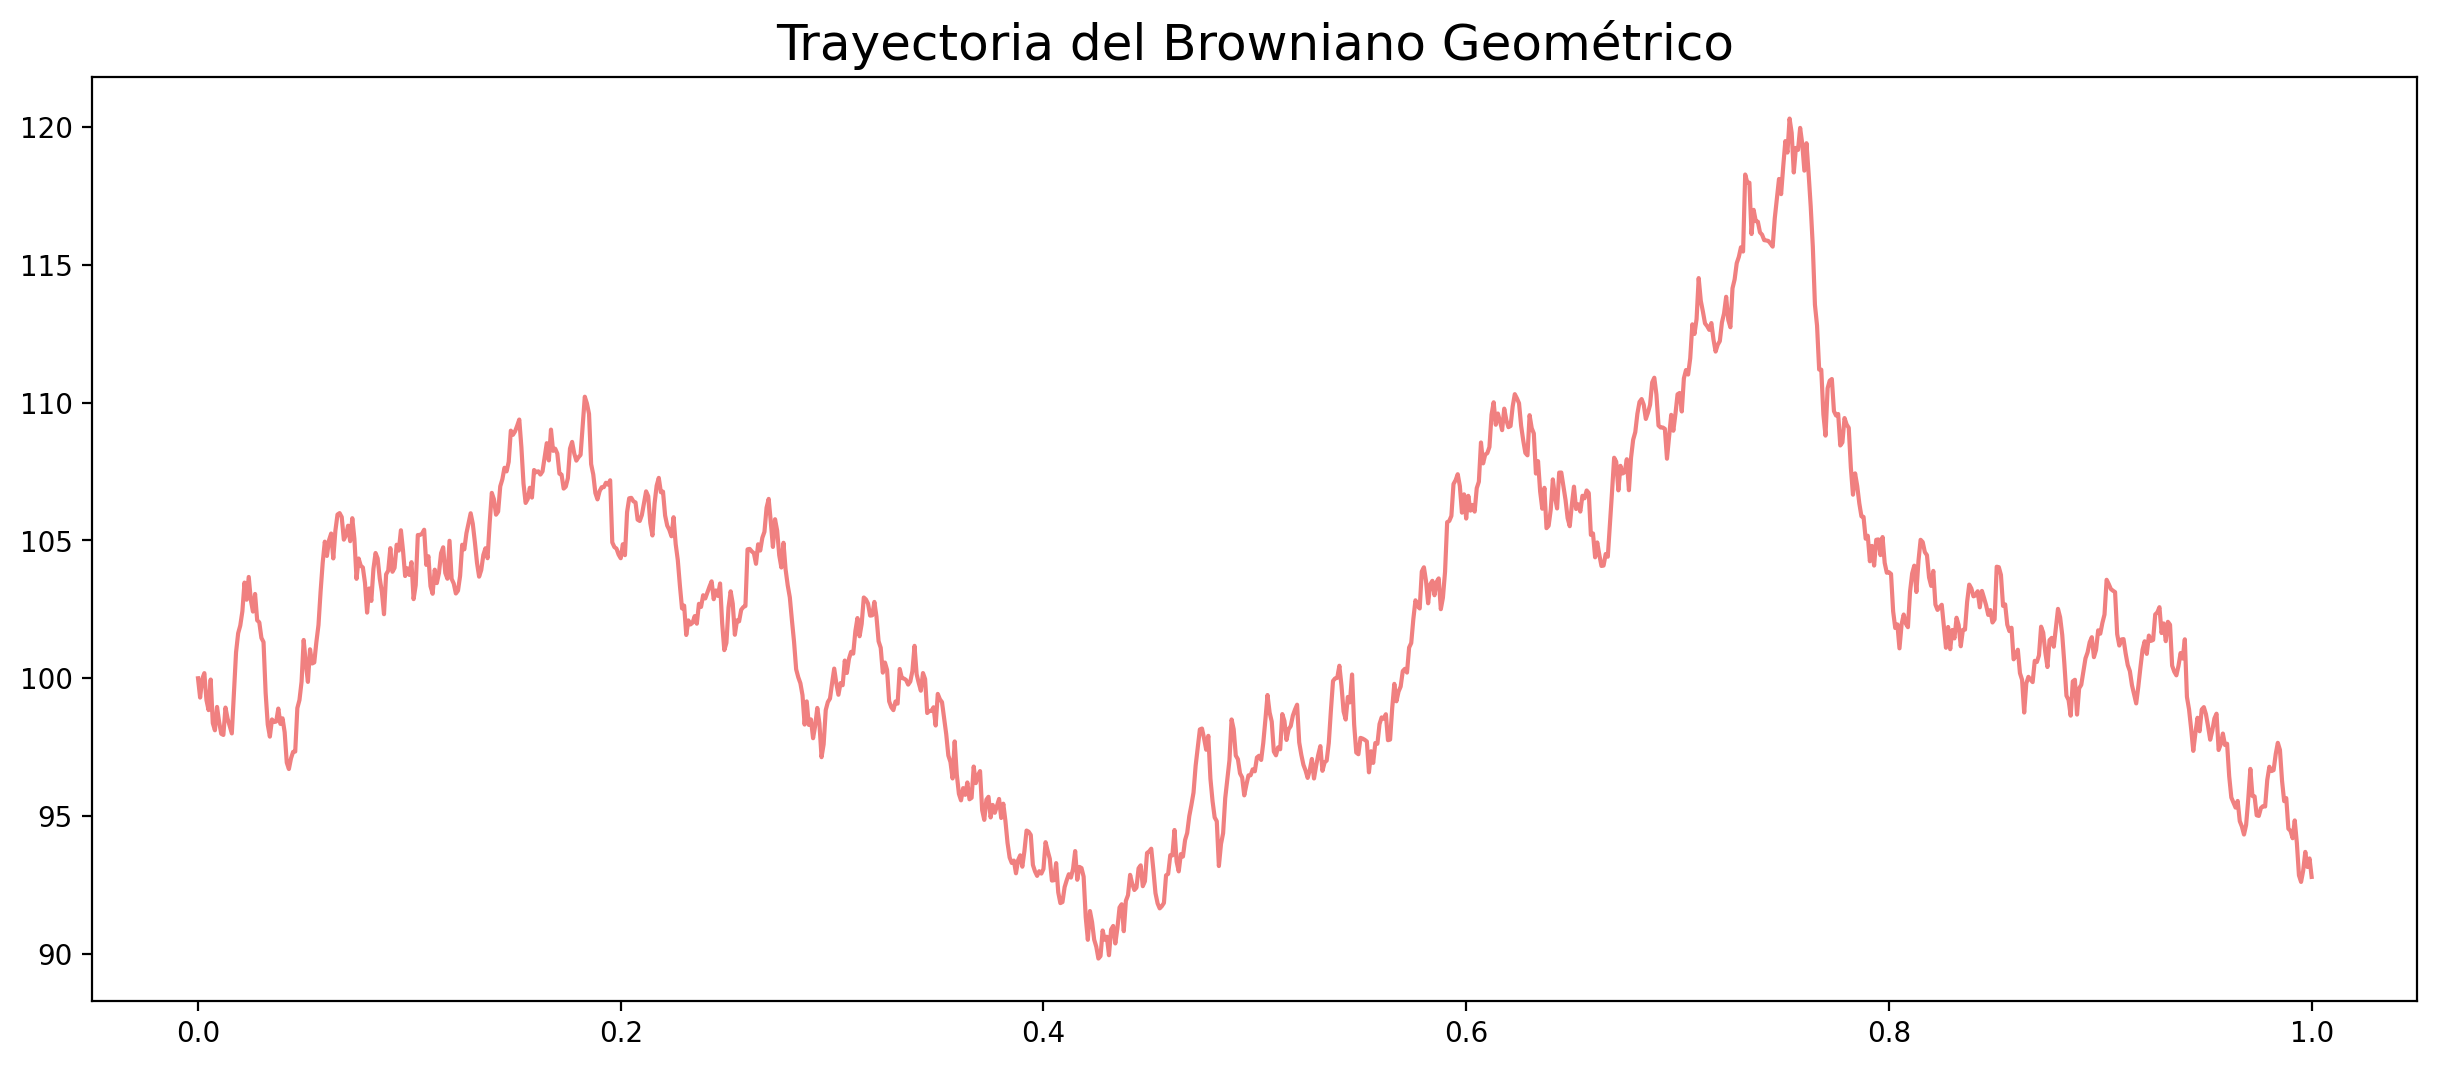

In [28]:
#Trayectorias del Movimiento Browniano Geometrico
S_0 = 100
mu = 0.21
sigma = 0.21

#grid = np.linspace(0, 1,1001)
np.random.seed(seed = 123)

# Declaración del proceso de Wiener a 1000 pasos...
Browniano = np.append(0, stats.norm.rvs(loc=0,
                                        scale=(1/1000)**0.5,
                                        size = 1000).cumsum())

# Acoplamiento del proceso de Wiener a un fenómeno creciente a tasa exponencial...
BGeometrico = S_0*np.e**((mu-sigma**2/2)*grid + sigma*Browniano)

plt.figure(figsize=(15,6))
plt.plot(grid,BGeometrico, color = "lightcoral")
plt.title("Trayectoria del Browniano Geométrico", fontsize = 18)

In [29]:
BGeometrico

array([100.        ,  99.30031057,  99.97896396, ...,  93.15504814,
        93.46398349,  92.79412599])

In [30]:
Browniano

array([ 0.        , -0.03433065, -0.00279182, ..., -1.23085237,
       -1.21598132, -1.25112784])

In [31]:
S_0

100

In [32]:
mu

0.21

In [33]:
sigma

0.21

Text(0.5, 1.0, 'Trayectorias del Movimiento Browniano Geométrico')

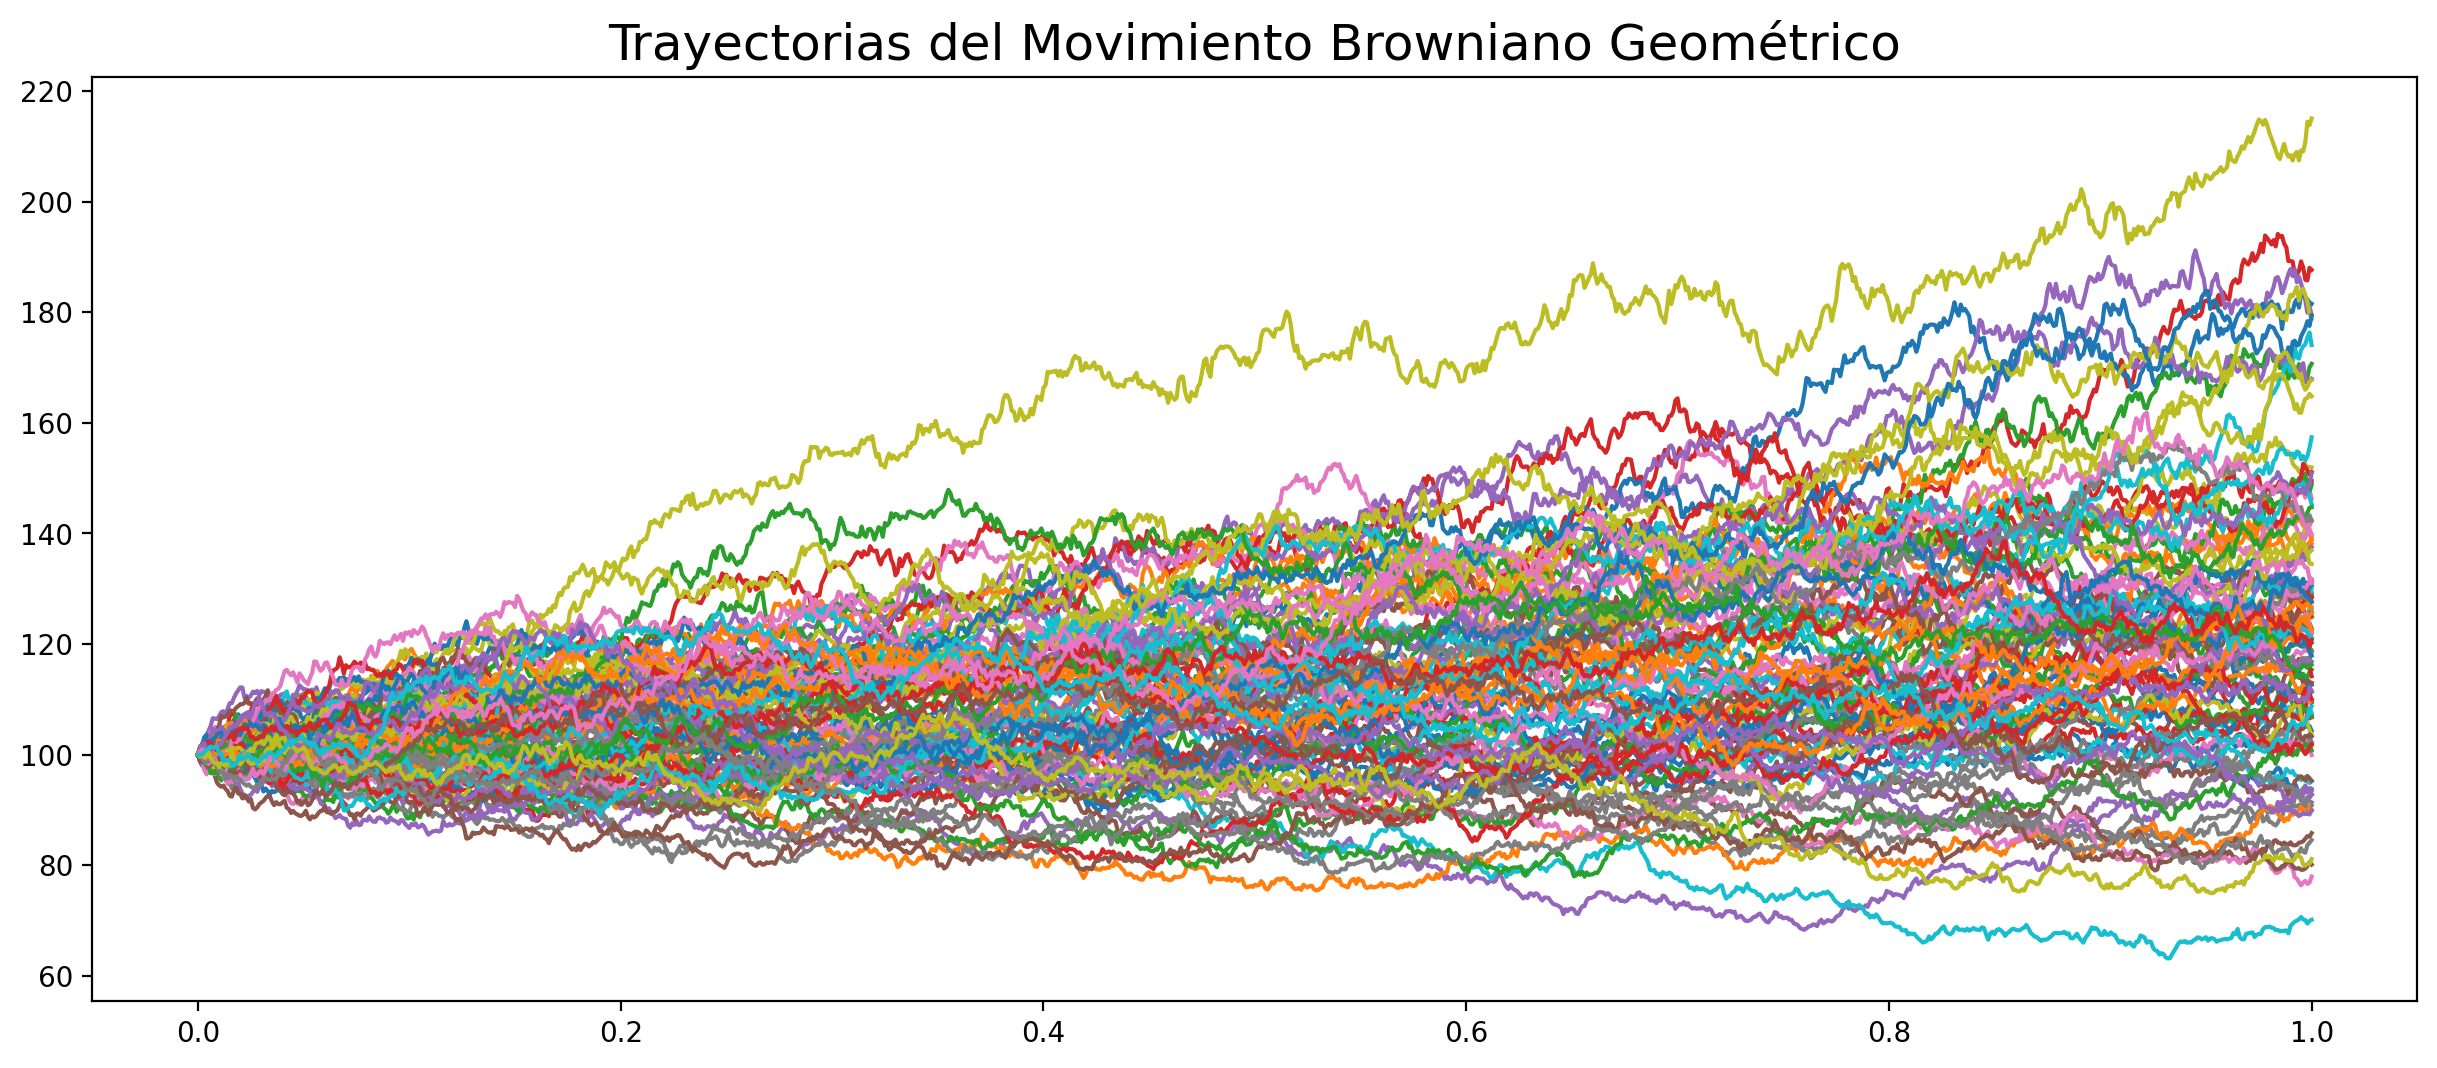

In [34]:
#Haciendo Varias trayectorias del Browniano Geométrico
grid = np.linspace(0,1,1001)

plt.figure(figsize=(15,6))

np.random.seed(seed = 123)

for i in range(100):
    
    Browniano = np.append(0,stats.norm.rvs(0,(1/1000)**0.5,size = 1000).cumsum())
    BGeometrico = S_0*np.e**((mu-sigma**2/2)*grid + sigma*Browniano)
    plt.plot(grid,BGeometrico)
plt.title("Trayectorias del Movimiento Browniano Geométrico", fontsize = 18) 

## Utilizando el Movimiento Browniano Geométrico para simular el comportamiento de un activo

Supongamos que el precio de un activo $\{S_t: t\geq0\}$ se comporta como un movimiento geométrico y nosotros quisieramos simular distintas trayectorias para ver el comportamiento del precio en un tiempo $T$, entonces necesitariamos estimar los paramétros del modelo.

$$S_T = S_0 e^{(\mu - \sigma ^2/2)dt + \sigma W_t}$$

Si tenemos observaciones de los precios diarios sabemos que los logrendimientos diarios tienen una distribución normal con media $\mu - \sigma ^2/2$ y desviación $\sigma$, podemos reparametrizar y decir que siguen una distribución con media $\overline{\mu}$ y varianza $\overline{\sigma}$ y con ello podemos utilizar los siguientes estimadores.

$$\hat{\overline{\mu}} = \frac{1}{N}\sum_{i = 1}^N lR_i$$

$$\hat{\overline{\sigma}} =\sqrt{ \frac{1}{N-1} \sum_{i = 1}^N (lR_i - \hat{\overline{\mu}})^2} $$

donde $lR_i$ son los log-rendimientos.

In [37]:
precios_NFLX = pd.read_csv('NLFX.csv', header = 0, index_col = 0)
precios_NFLX

NFLX
Date                  
30/11/2021  641.900024
01/12/2021  617.770020
02/12/2021  616.469971
03/12/2021  602.130005
06/12/2021  612.690002
...                ...
24/11/2023  479.559998
27/11/2023  479.170013
28/11/2023  479.000000
29/11/2023  477.190002
NaN                NaN

[504 rows x 1 columns]

In [38]:
precios_NFLX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504 entries, 30/11/2021 to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NFLX    503 non-null    float64
dtypes: float64(1)
memory usage: 7.9+ KB


In [39]:
## Hagamos un análisis para los precios de NETFLIX
precios_NFLX = pd.read_csv('NLFX.csv', header = 0, index_col = 0)
precios_NFLX.index = pd.to_datetime(precios_NFLX.index, dayfirst = True)
precios_NFLX.index = precios_NFLX.index.to_period('D')
precios_NFLX

NFLX
Date                  
2021-11-30  641.900024
2021-12-01  617.770020
2021-12-02  616.469971
2021-12-03  602.130005
2021-12-06  612.690002
...                ...
2023-11-24  479.559998
2023-11-27  479.170013
2023-11-28  479.000000
2023-11-29  477.190002
NaT                NaN

[504 rows x 1 columns]

In [40]:
# Consultando info de un año especifico...
precios_NFLX.loc['2022']

NFLX
Date                  
2022-01-03  597.369995
2022-01-04  591.150024
2022-01-05  567.520020
2022-01-06  553.289978
2022-01-07  541.059998
...                ...
2022-12-23  294.959991
2022-12-27  284.170013
2022-12-28  276.880005
2022-12-29  291.119995
2022-12-30  294.880005

[251 rows x 1 columns]

In [41]:
precios_NFLX.loc['2022'].head(1)

NFLX
Date                  
2022-01-03  597.369995

In [42]:
# Consultando la 1er info de un año especifico...
precios_NFLX.loc['2022']['NFLX'][0]

/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/3947547472.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  precios_NFLX.loc['2022']['NFLX'][0]


597.369995

<Axes: xlabel='Date'>

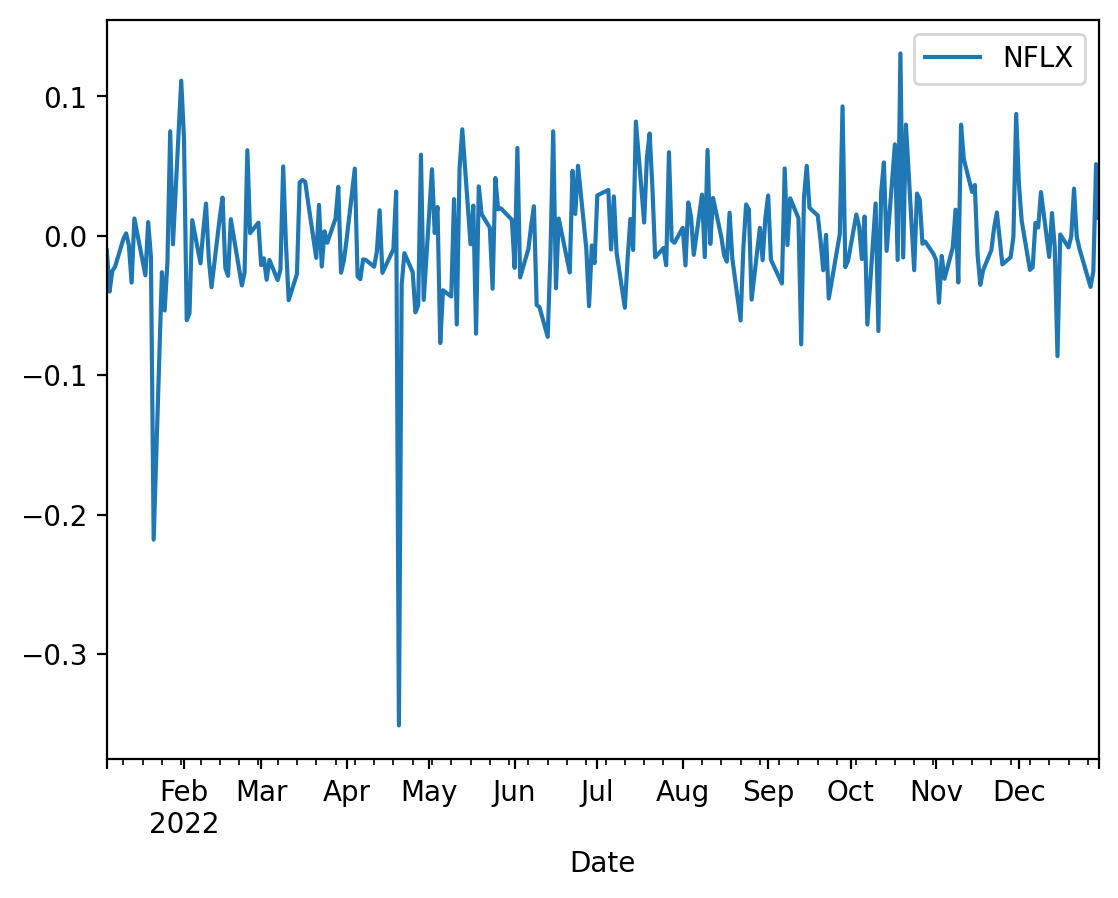

In [43]:
rend_NFLX = precios_NFLX.loc['2022'].pct_change().dropna()
rend_NFLX.plot()

<Axes: xlabel='Date'>

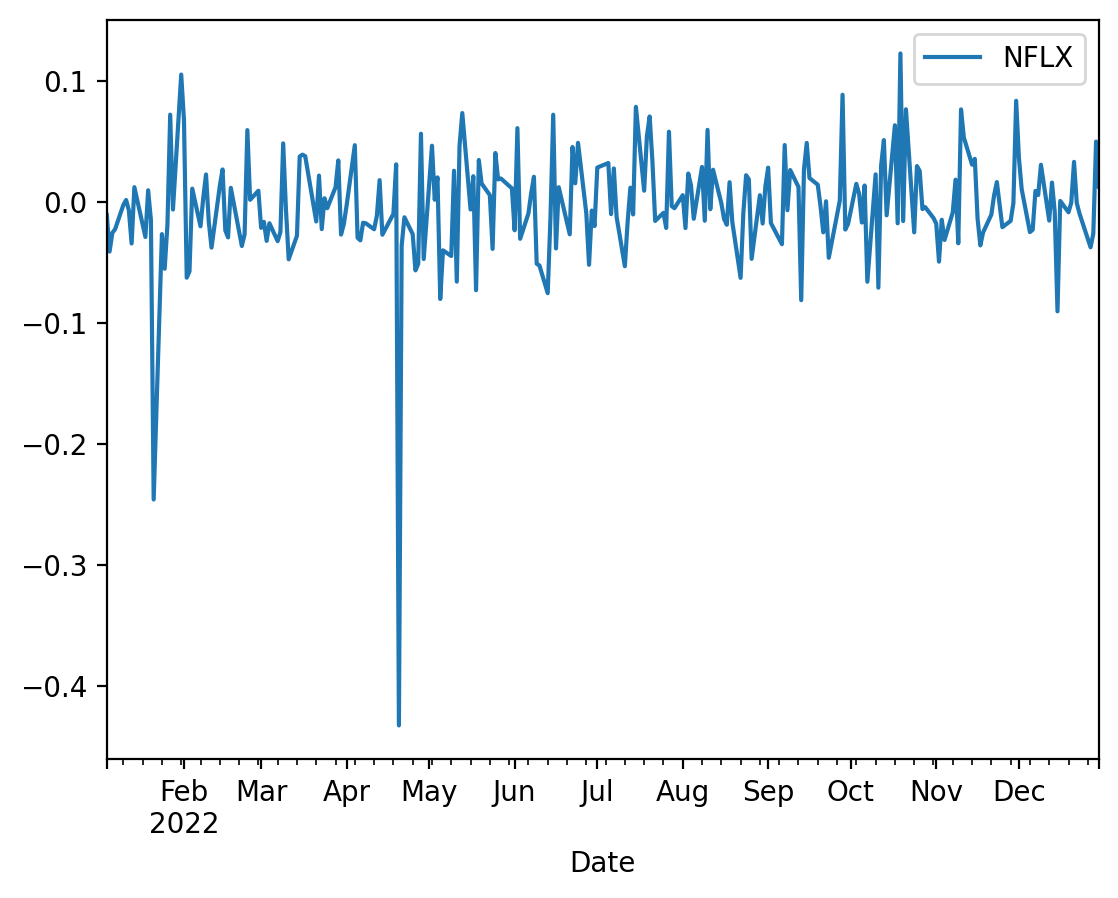

In [44]:
# Vamos a utilizar solo el año 2022 y simular trayectorias del 2023
# Se calculan rendimientos aritméticos...
rend_NFLX = precios_NFLX.loc['2022'].pct_change().dropna()
lr_NFLX = np.log(1+rend_NFLX)
lr_NFLX.plot()

Text(0.5, 1.0, 'Log-Rendimientos Netflix y Ajuste Normal')

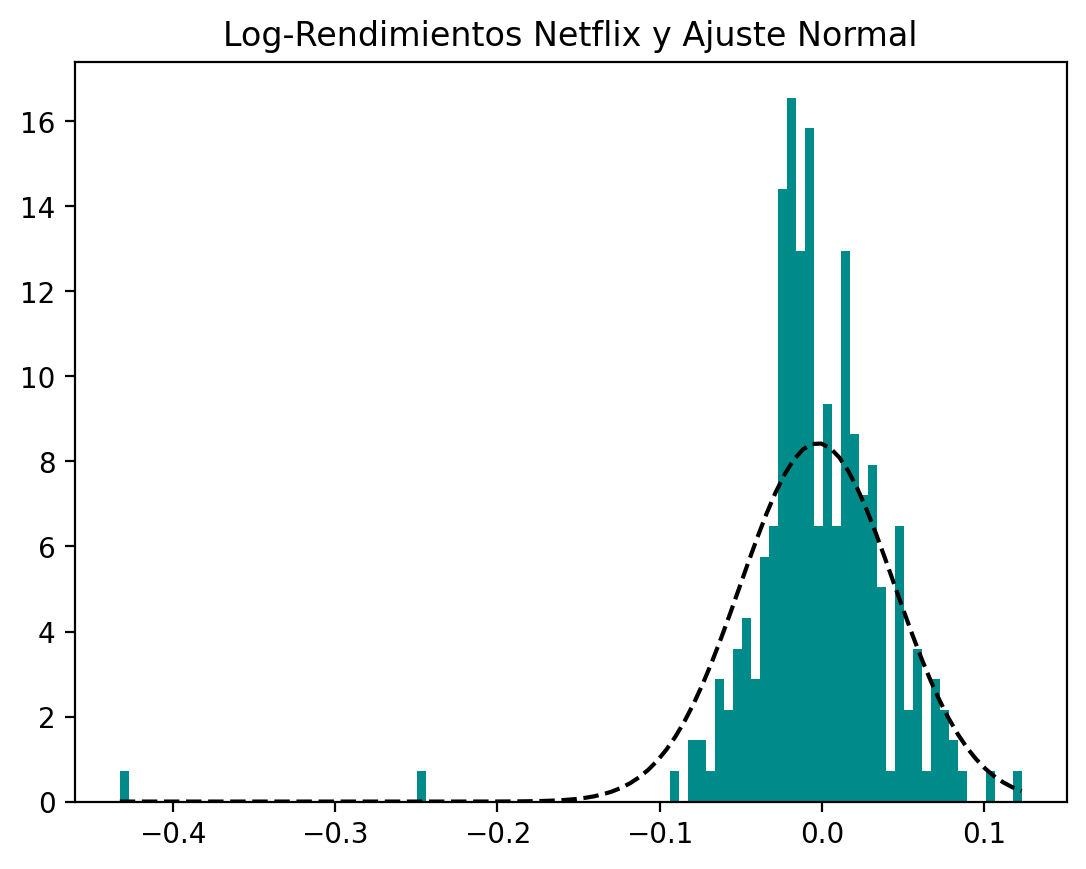

In [45]:
mu_lr_NFLX = lr_NFLX.mean()
std_lr_NFLX = lr_NFLX.std(ddof = 1)

# Histograma de los datos: distribución empirica:
plt.hist(lr_NFLX, bins = 100, density = True, color = "darkcyan")

# Agregando la densidad normal:
x = np.linspace(lr_NFLX.min(),lr_NFLX.max(),100)
densidad = stats.norm.pdf(x, mu_lr_NFLX, std_lr_NFLX)
plt.plot(x,densidad,'--k')
plt.title('Log-Rendimientos Netflix y Ajuste Normal')

## Hipótesis del Test Jarque-Bera

El **Test de Jarque-Bera** es una prueba estadística que se utiliza para determinar si una muestra de datos se distribuye normalmente. Este test se basa en el cálculo de la asimetría (skewness) y la curtosis (kurtosis) de la muestra.

### Hipótesis del Test Jarque-Bera

- **Hipótesis Nula ($(H_0)$)**: La muestra proviene de una distribución normal.
- **Hipótesis Alternativa ($(H_a)$)**: La muestra no proviene de una distribución normal.

### Interpretación
- Si el valor del estadístico de Jarque-Bera es significativamente alto (es decir, si el p-valor es menor que un nivel de significancia predefinido, como 0.05), se rechaza la hipótesis nula. Esto sugiere que los datos no se distribuyen normalmente.
- Si el p-valor es mayor que el nivel de significancia, no hay evidencia suficiente para rechazar la hipótesis nula, lo que indica que los datos pueden ser considerados como normalmente distribuidos.

### Cálculo
El estadístico de Jarque-Bera se calcula de la siguiente manera:

$$
JB = \frac{n}{6} \left( S^2 + \frac{(K-3)^2}{4} \right)
$$

Donde:
- \( n \) es el tamaño de la muestra,
- \( S \) es la asimetría (skewness) de la muestra,
- \( K \) es la curtosis (kurtosis) de la muestra.

El test es especialmente útil en análisis de regresión y econometría, donde la normalidad de los residuos es una suposición importante.


In [47]:
# Prueba JarqueBera
stats.jarque_bera(lr_NFLX) # Me dice que Rechace :/

SignificanceResult(statistic=8827.786744808303, pvalue=0.0)

In [48]:
print("Rentabilidad promedio de los retornos logaritmicos:")
mu_lr_NFLX[0]

Rentabilidad promedio de los retornos logaritmicos:


/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/2823570065.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu_lr_NFLX[0]


-0.002823872670655347

In [49]:
print("Desv. Est. de los retornos logaritmicos:")
std_lr_NFLX

Desv. Est. de los retornos logaritmicos:


NFLX    0.047318
dtype: float64

Text(0, 0.5, '$W_{t}$')

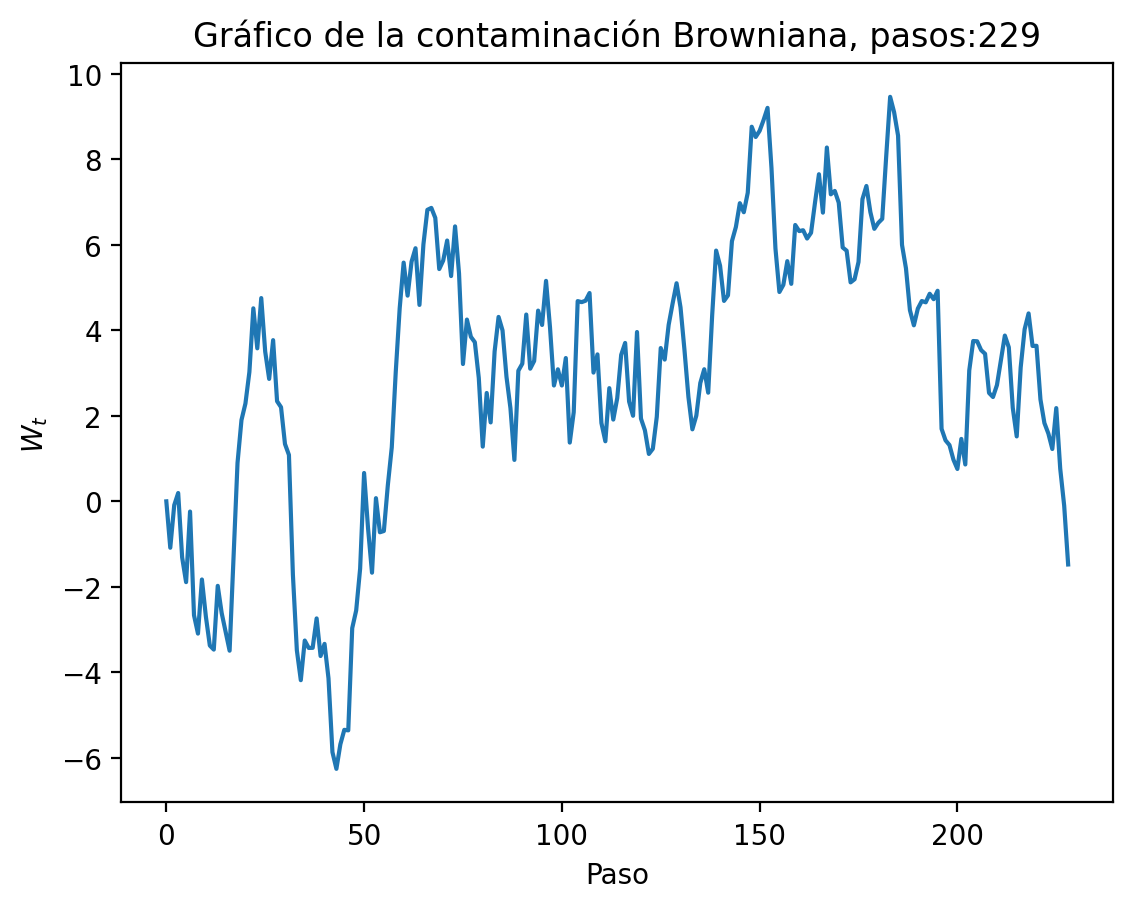

In [141]:
np.random.seed(seed = 123)
Browniano = np.append(0, stats.norm.rvs(0,1,size = len(grid)-1).cumsum())
plt.plot(Browniano)
# Añadir títulos y etiquetas
plt.title("Gráfico de la contaminación Browniana, pasos:" + str(len(Browniano)))
plt.xlabel("Paso")
plt.ylabel("$W_{t}$")


/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/3861668883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S_0 = precios_NFLX.loc['2023']['NFLX'][0]
/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/3861668883.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  BGeometrico = S_0*np.e**((mu_lr_NFLX[0])*grid +std_lr_NFLX[0]*Browniano)


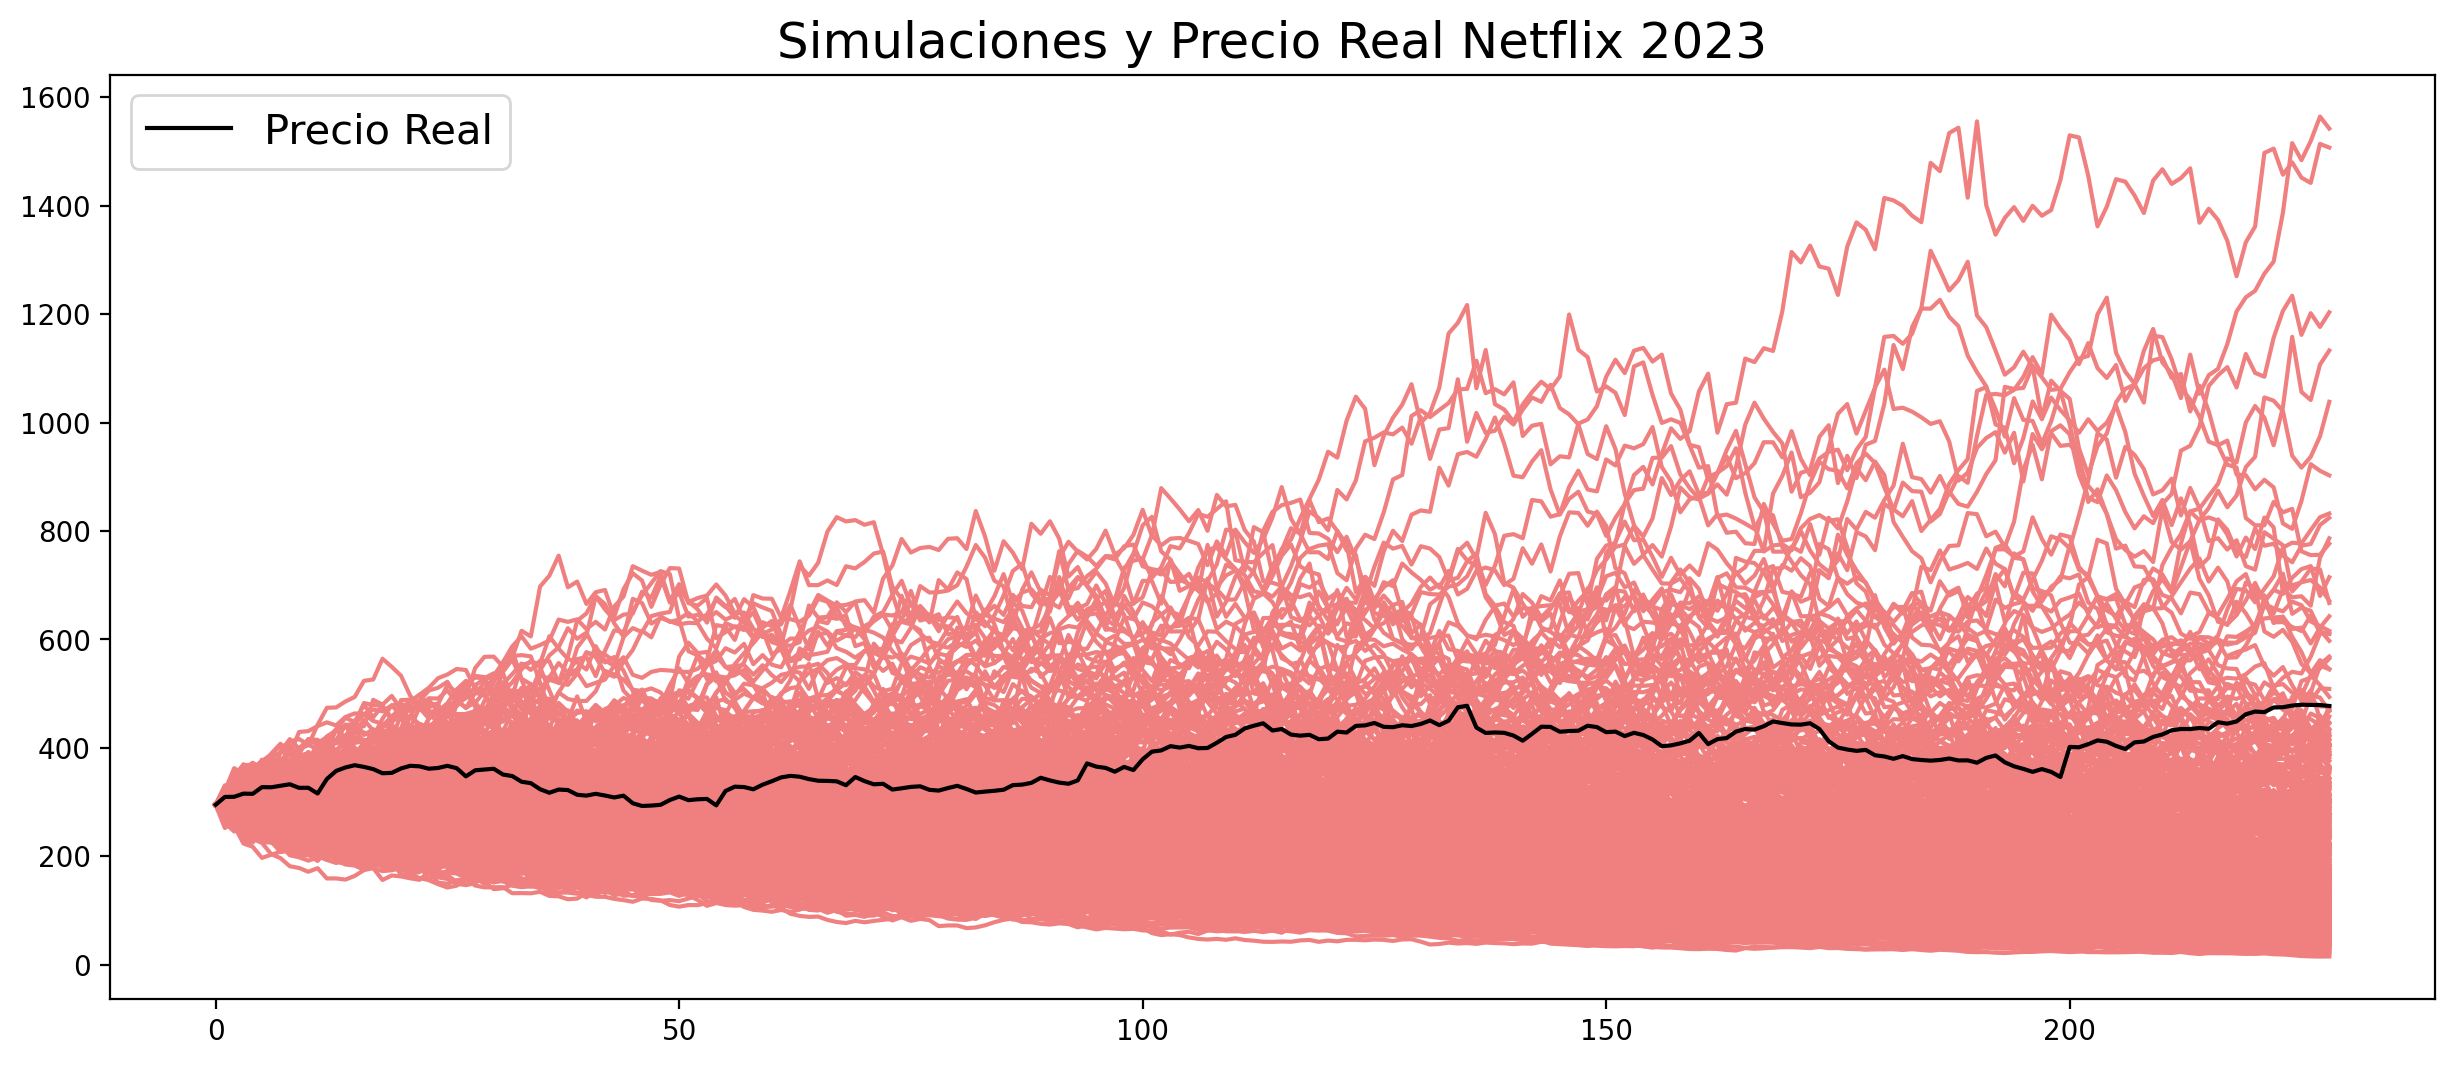

In [105]:
# Vamos a hacer la simulación de trayectorias
S_0 = precios_NFLX.loc['2023']['NFLX'][0]
grid = np.arange(len(precios_NFLX.loc['2023']))
np.random.seed(seed = 123)

plt.figure(figsize=(15,6))
for i in range(0,500):
    # Se genera la perturbación/ruido:
    Browniano = np.append(0, stats.norm.rvs(0,1,size = len(grid)-1).cumsum())
    # Se enchufa el ruido a la ecuación caracteristíca:
    BGeometrico = S_0*np.e**((mu_lr_NFLX[0])*grid +std_lr_NFLX[0]*Browniano)
    plt.plot(grid,BGeometrico, color = "lightcoral")
    
plt.title("Simulaciones y Precio Real Netflix 2023", fontsize = 18)
plt.plot(grid,precios_NFLX.loc['2023'], color = "black", label = "Precio Real")
plt.legend(loc = "upper left", fontsize = 15)

Podemos crear un intervalo de confianza de $S_T$ ya sea de forma teorica y con ayuda de las simulaciones.

1. De forma teorica sabemos que $ln(S_T)$ sigue una distribución normal con media $ln(S_0) + \overline{\mu}T$ y varianza $\sigma^2 T$, el intervalo de confianza de nivel $\alpha$ estaría dado por 

$$(e^{ln(S_0) + \overline{\mu}T - z_{\alpha/2}\sigma\sqrt{T}},e^{ln(S_0) + \overline{\mu}T + z_{\alpha/2}\sigma\sqrt{T}})$$

In [107]:
# Vamos a graficar unicamente los intervalos de confianza.
z = stats.norm.ppf(0.975)
lower = np.e**(np.log(S_0) + mu_lr_NFLX[0]*grid-z*std_lr_NFLX[0]*(grid**0.5))
upper = np.e**(np.log(S_0) + mu_lr_NFLX[0]*grid+z*std_lr_NFLX[0]*(grid**0.5))

/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/2145610890.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lower = np.e**(np.log(S_0) + mu_lr_NFLX[0]*grid-z*std_lr_NFLX[0]*(grid**0.5))
/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/2145610890.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  upper = np.e**(np.log(S_0) + mu_lr_NFLX[0]*grid+z*std_lr_NFLX[0]*(grid**0.5))


In [54]:
lower

array([294.950012  , 268.06781344, 257.23783951, 249.06162529,
       242.26358582, 236.34888361, 231.06336779, 226.25584635,
       221.82767088, 217.71022445, 213.85347834, 210.21961296,
       206.7792061 , 203.50882801, 200.38945628, 197.40539266,
       194.54350021, 191.79265193, 189.14332351, 186.5872864 ,
       184.11737276, 181.72729256, 179.41148941, 177.16502556,
       174.9834891 , 172.86291832, 170.79973962, 168.79071599,
       166.83290396, 164.92361744, 163.0603971 , 161.24098425,
       159.46329852, 157.72541865, 156.02556581, 154.36208917,
       152.73345327, 151.13822697, 149.57507372, 148.04274294,
       146.54006249, 145.06593182, 143.61931599, 142.19924031,
       140.80478544, 139.43508311, 138.08931217, 136.76669509,
       135.46649473, 134.18801146, 132.93058053, 131.69356962,
       130.47637672, 129.27842805, 128.09917627, 126.9380988 ,
       125.79469622, 124.6684909 , 123.55902565, 122.46586252,
       121.38858169, 120.32678039, 119.28007197, 118.24

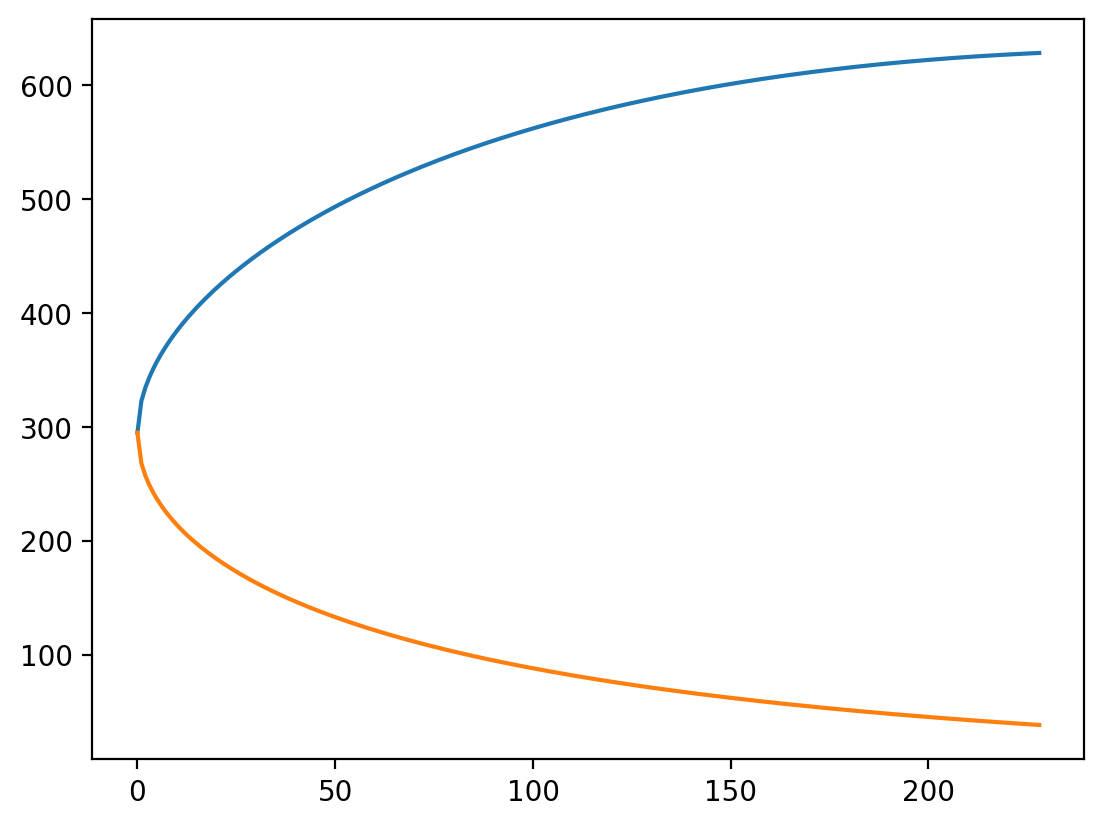

In [145]:
plt.plot(upper)
plt.plot(lower)

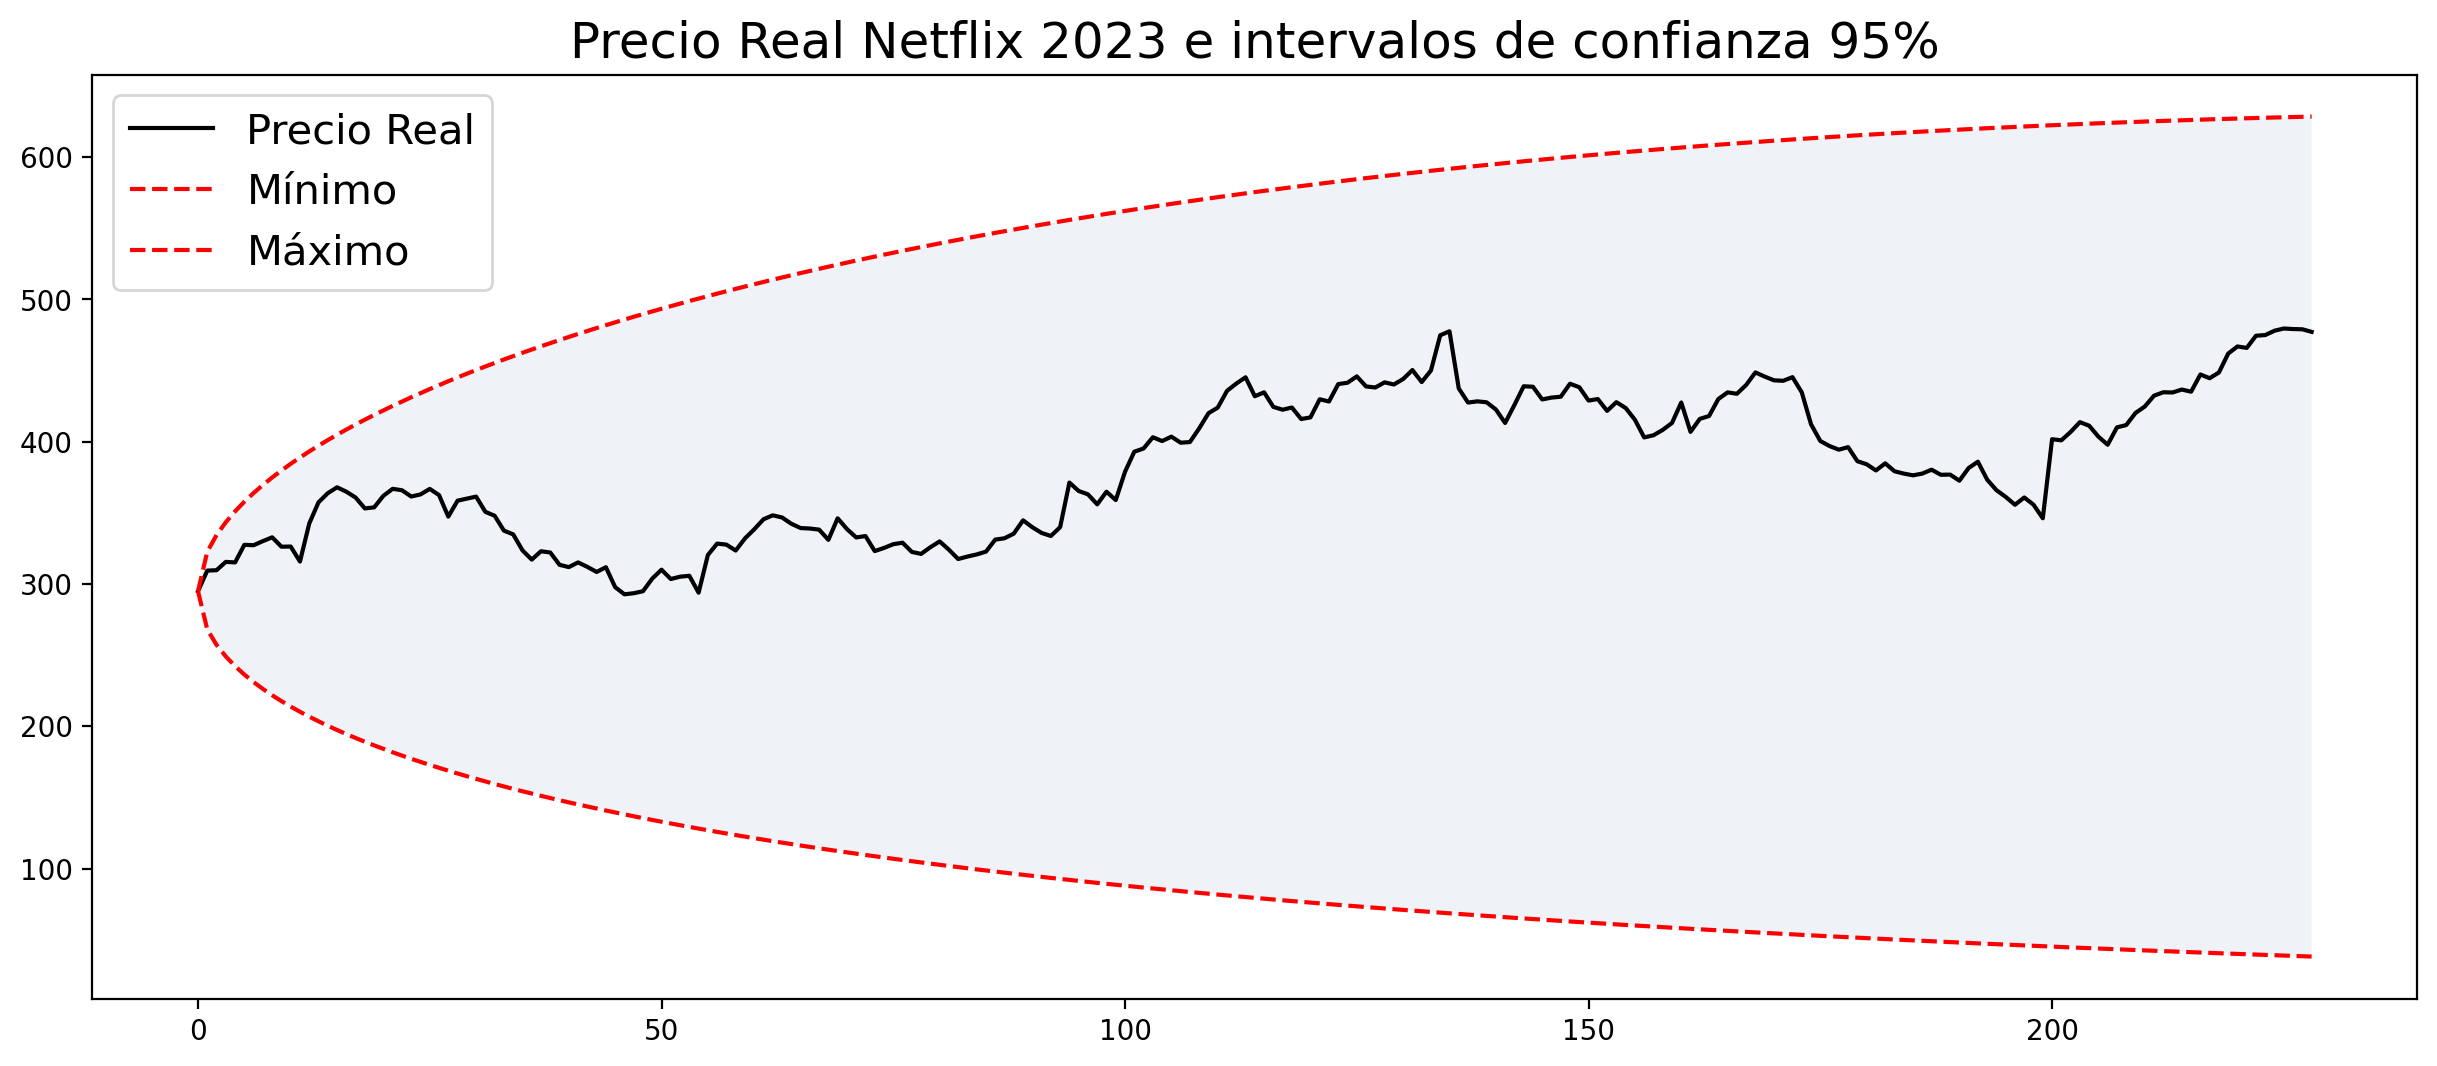

In [55]:
plt.figure(figsize=(15,6))
plt.plot(grid,precios_NFLX.loc['2023'], color = "black", label = "Precio Real")
plt.plot(grid,lower,'--r',label = "Mínimo")
plt.plot(grid,upper,'--r',label = "Máximo")

plt.title("Precio Real Netflix 2023 e intervalos de confianza 95%", fontsize = 18)
plt.legend(fontsize = 15)
plt.gca().fill_between(grid, 
                       lower, upper, 
                       facecolor='lightsteelblue', 
                       alpha=0.2)

/var/folders/g7/1s7pc8vd6cl9y18vcddsn9w00000gn/T/ipykernel_8155/2279217605.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  BGeometrico = S_0*np.e**((mu_lr_NFLX[0]-std_lr_NFLX[0]**2/2)*grid + std_lr_NFLX[0]*Browniano)


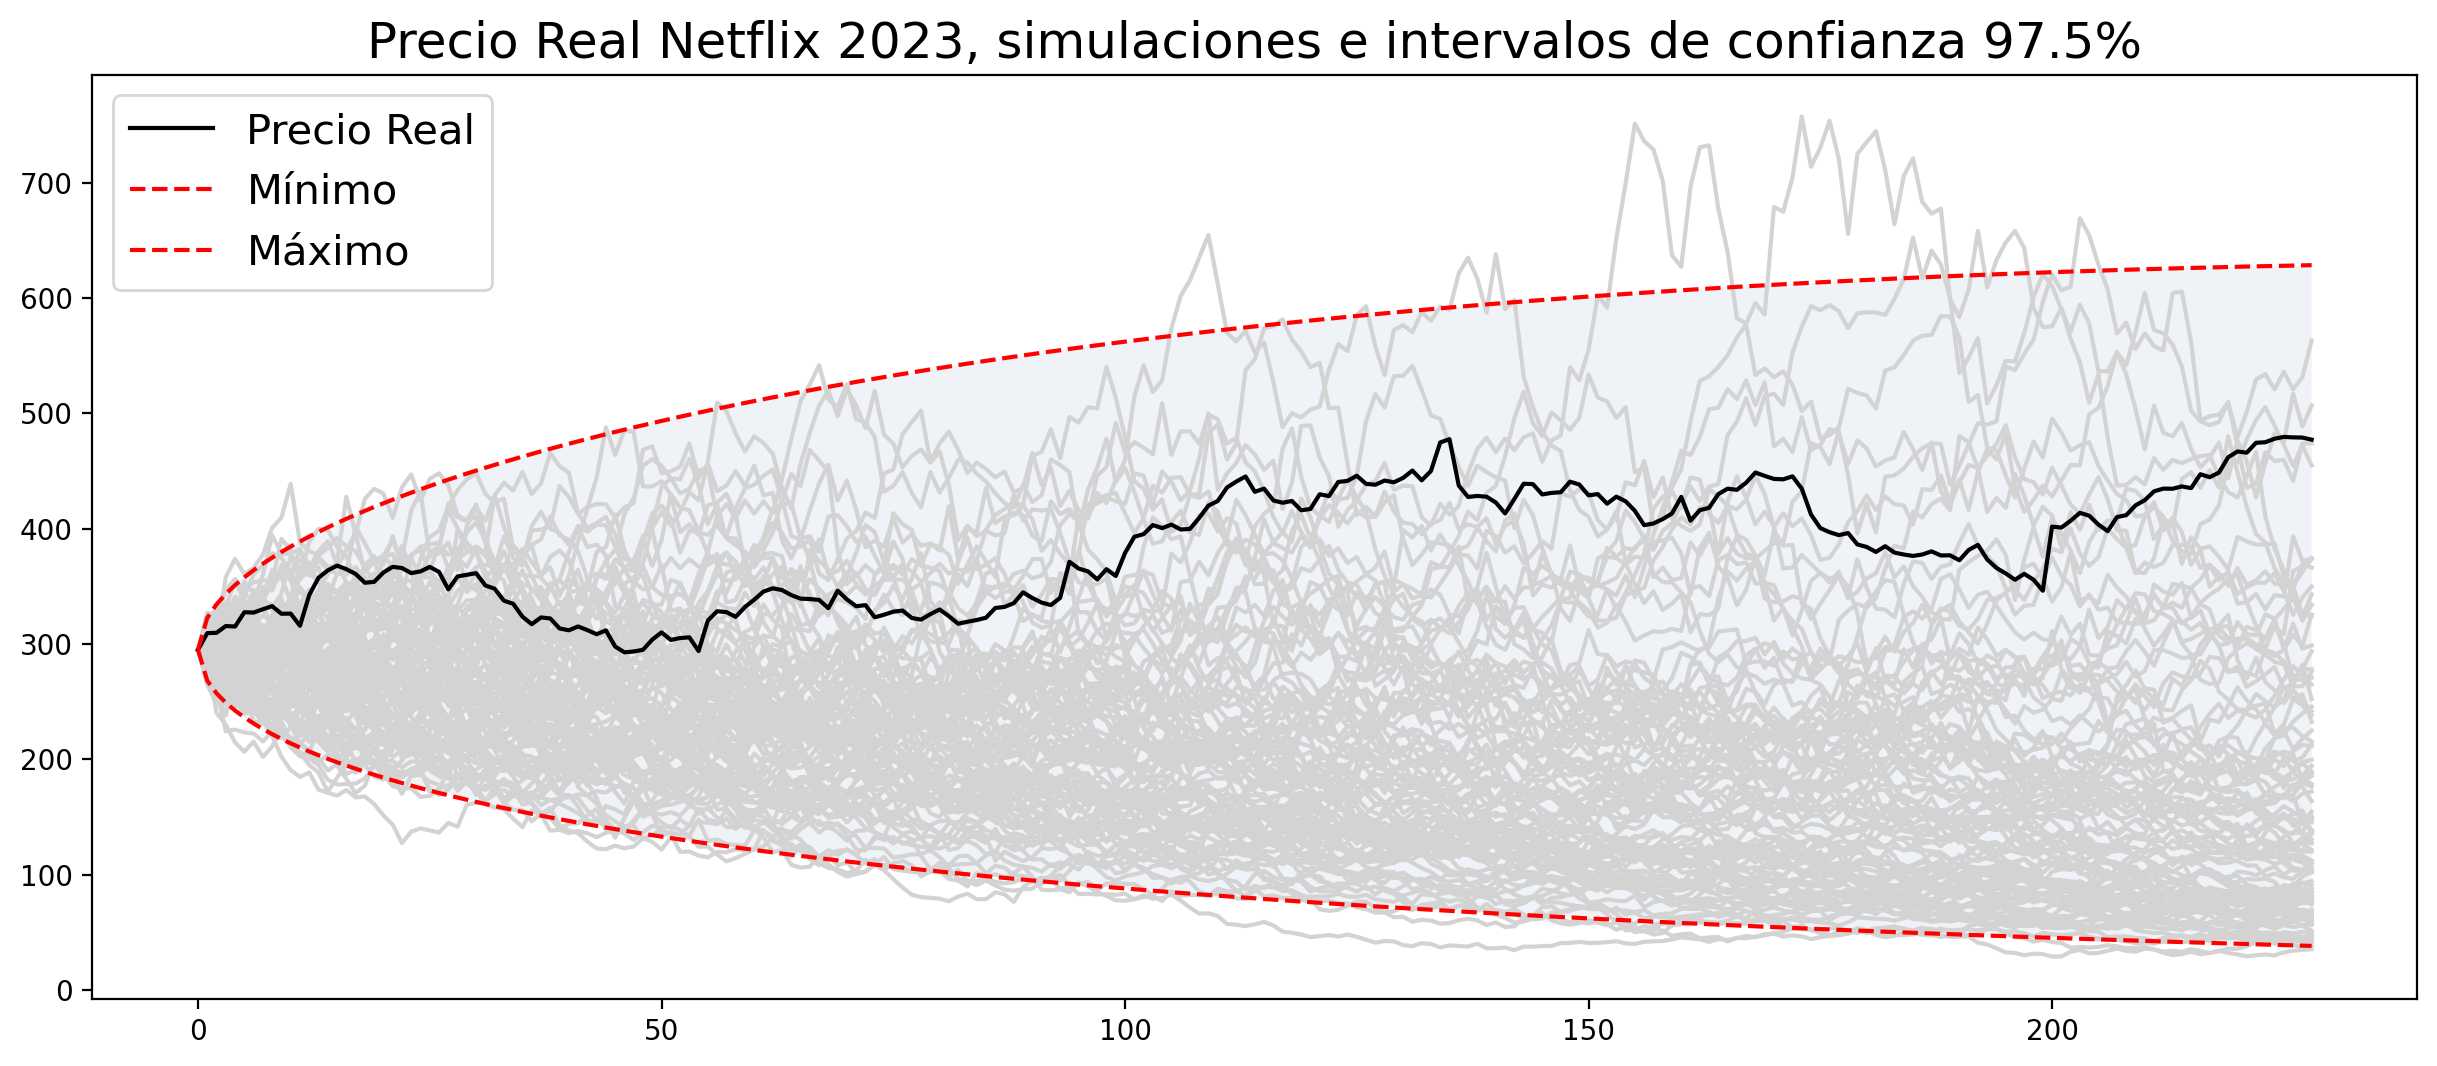

In [56]:
plt.figure(figsize=(15,6))
for i in range(0,100):
    Browniano = np.append(0,stats.norm.rvs(0,1,size = len(grid)-1).cumsum())
    BGeometrico = S_0*np.e**((mu_lr_NFLX[0]-std_lr_NFLX[0]**2/2)*grid + std_lr_NFLX[0]*Browniano)
    plt.plot(grid,BGeometrico, color = "lightgray")
    
plt.title("Precio Real Netflix 2023, simulaciones e intervalos de confianza 97.5%", fontsize = 18)
plt.plot(grid,precios_NFLX.loc['2023'], color = "black", label = "Precio Real")
plt.plot(grid,lower,'--r',label = "Mínimo")
plt.plot(grid,upper,'--r',label = "Máximo")

plt.legend(fontsize = 15)
plt.gca().fill_between(grid, 
                       lower, upper, 
                       facecolor='lightsteelblue', 
                       alpha=0.2)